In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time

from darts.models import Prophet, AutoARIMA
from darts import TimeSeries
from darts.metrics import rmse

import warnings
warnings.simplefilter('ignore')

2022-11-20 23:48:39 darts.models WARNING: Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).


# Municipality #0

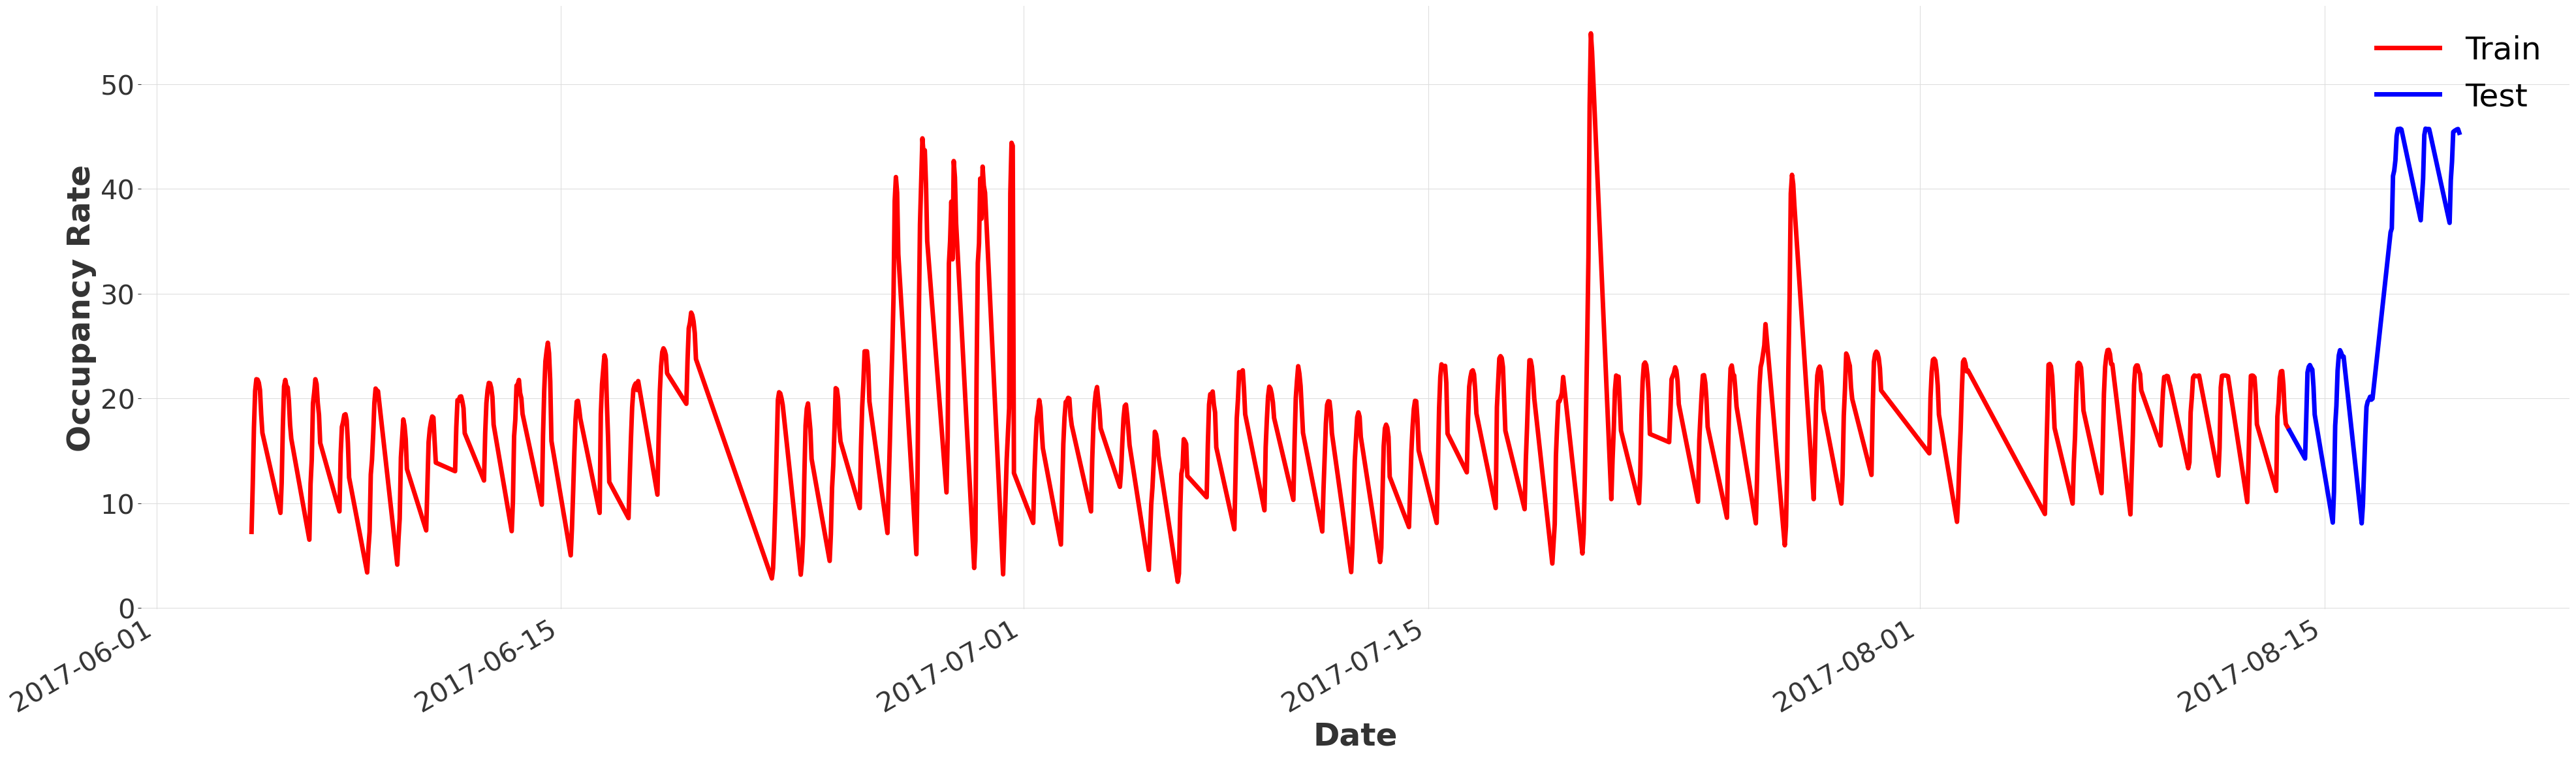

In [2]:
df = pd.read_csv('mun_0.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:50:01 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:50:02 cmdstanpy DEBUG: Adding TBB (C:\Users\omerf\AppData\Roaming\Python\Python39\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
2022-11-20 23:50:02 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-20 23:50:02 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\i4a2qie7.json


Auto-ARIMA completed. Training time is  80.498576 seconds.


2022-11-20 23:50:02 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\2x6jnpdz.json
2022-11-20 23:50:02 cmdstanpy DEBUG: idx 0
2022-11-20 23:50:02 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:50:02 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=48323', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\i4a2qie7.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\2x6jnpdz.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modeljcooyscj\\prophet_model-20221120235002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:50:02 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:50:02 cmdstanpy INFO: Chain [1] start processing
23:50:02 - cmdstanpy - INFO - Chain [1] done processing
2022-11-20 23:50:02 cmdstanpy INFO: Chain [1] done processing


Prophet completed. Training time is  0.4979895999999968 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.168804  80.498576
Prophet     0.168982   0.497990


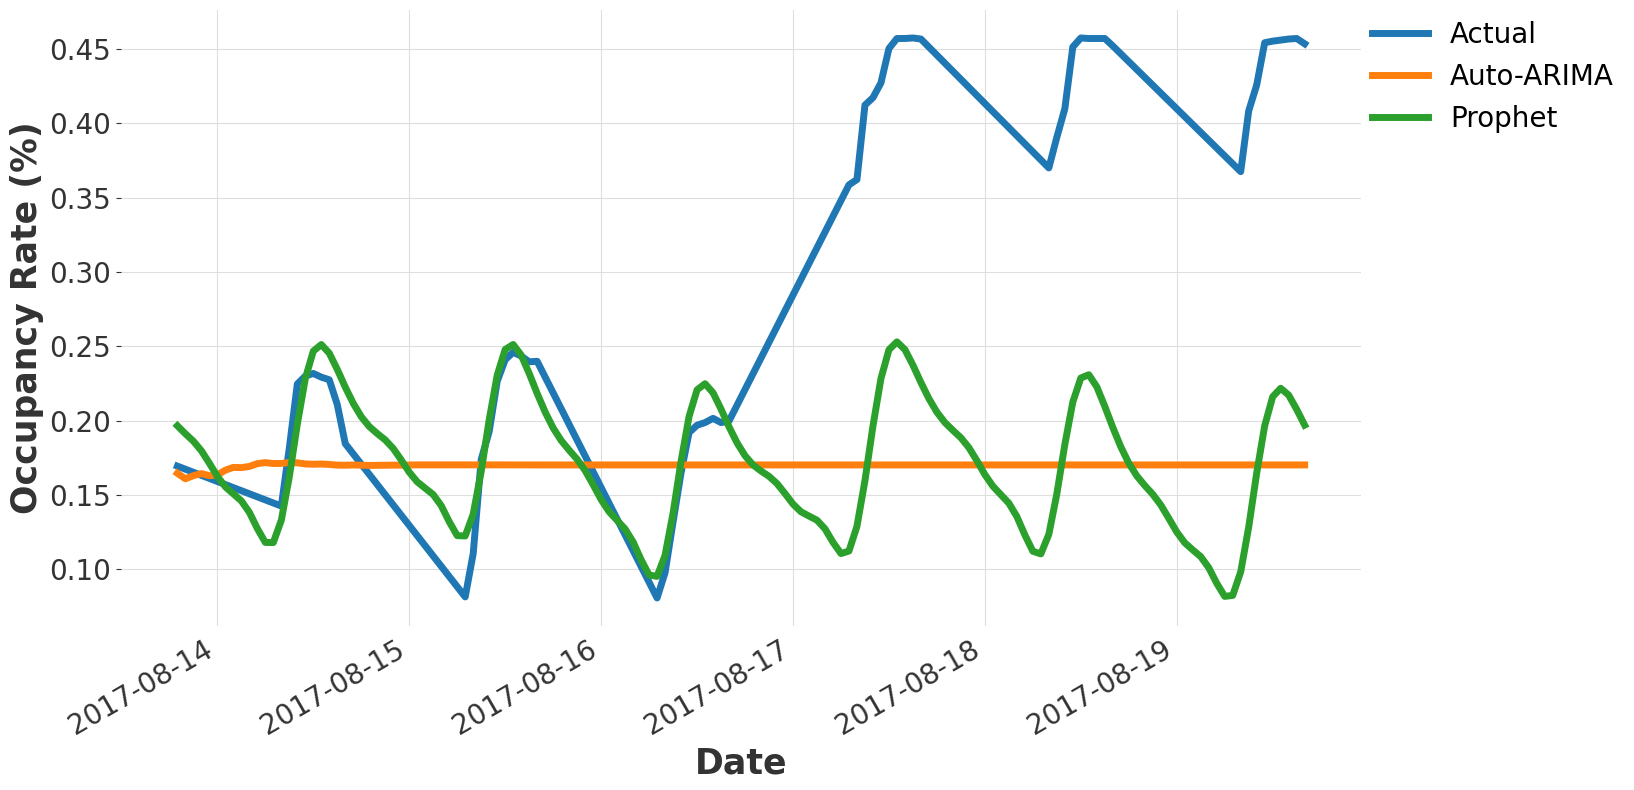

In [3]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #1

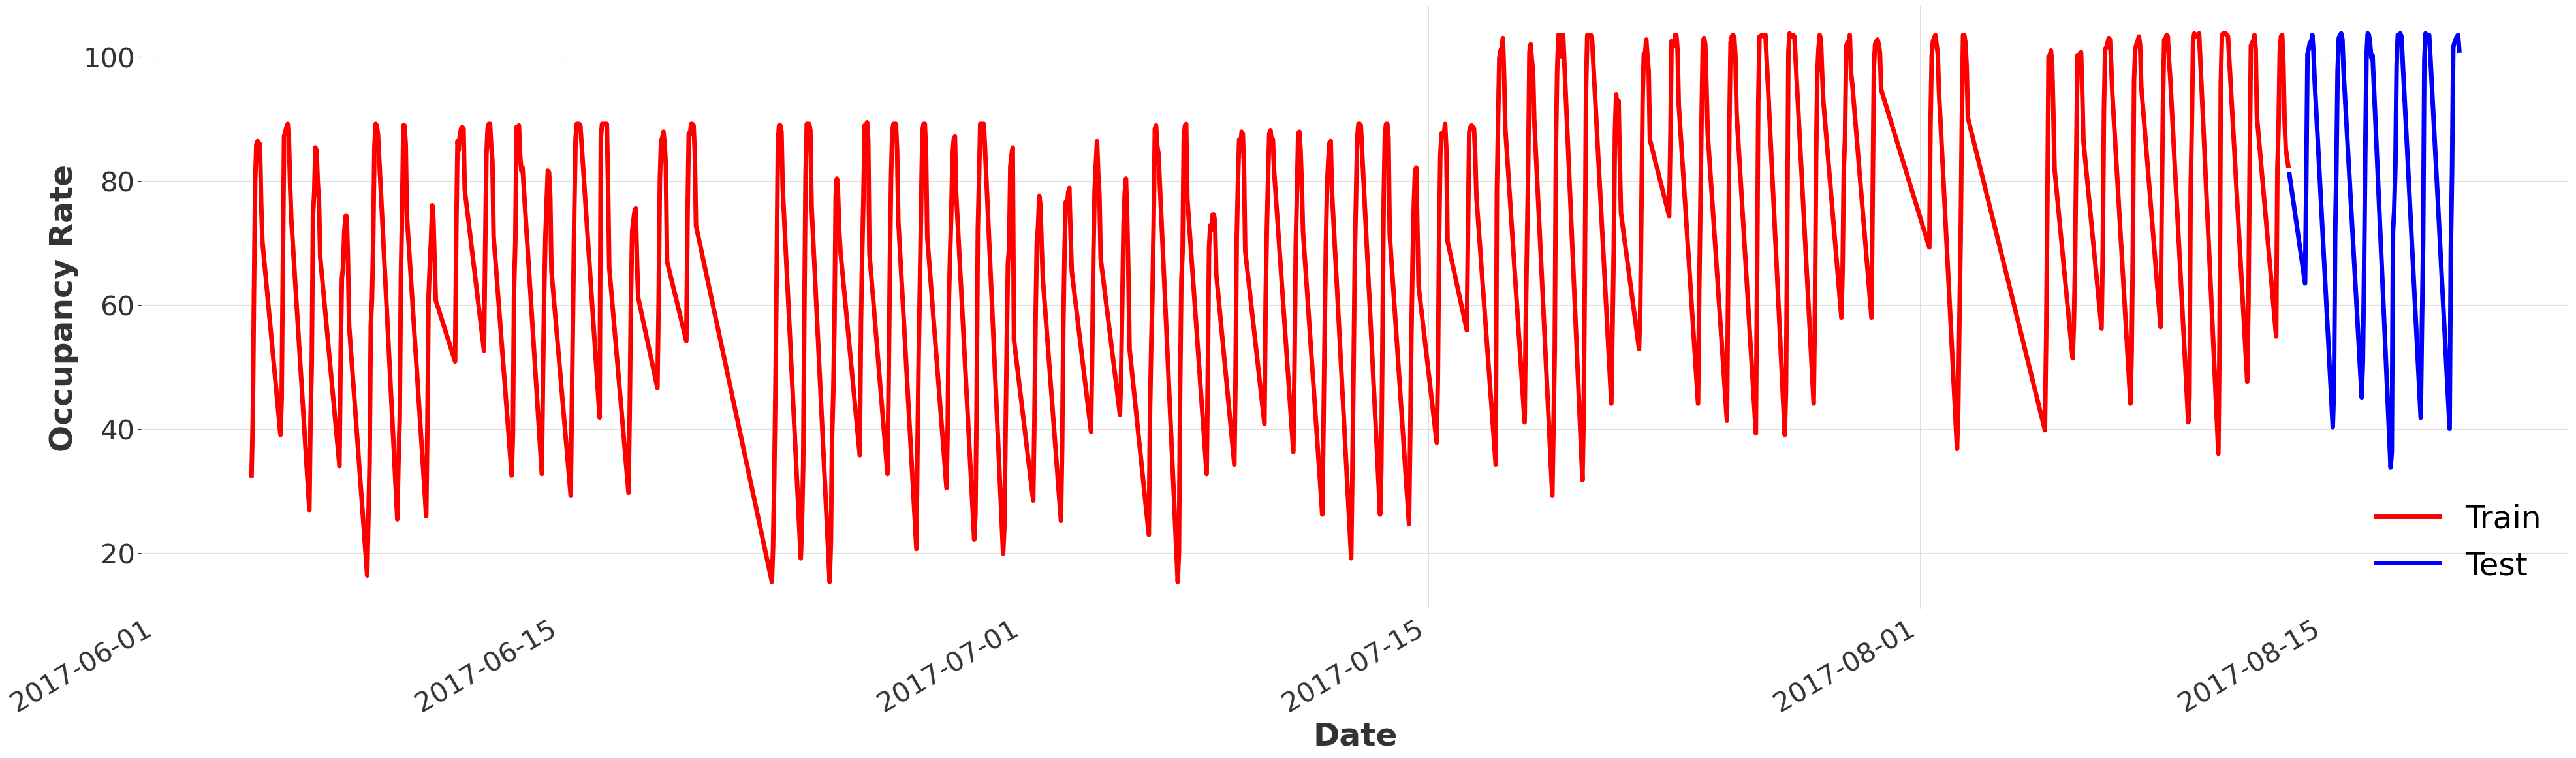

In [4]:
df = pd.read_csv('mun_1.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:51:07 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:51:07 cmdstanpy DEBUG: TBB already found in load path
2022-11-20 23:51:07 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Auto-ARIMA completed. Training time is  62.89770969999999 seconds.


2022-11-20 23:51:07 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\z0xbua04.json
2022-11-20 23:51:07 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\n3k_masa.json
2022-11-20 23:51:07 cmdstanpy DEBUG: idx 0
2022-11-20 23:51:07 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:51:07 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=22558', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\z0xbua04.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\n3k_masa.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelm5a1zy5c\\prophet_model-20221120235107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:51:07 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:51:07 cmdstanpy INFO: Chain [1] start processing
23:51:08 - cmds

Prophet completed. Training time is  0.5570791999999756 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.191972  62.897710
Prophet     0.071600   0.557079


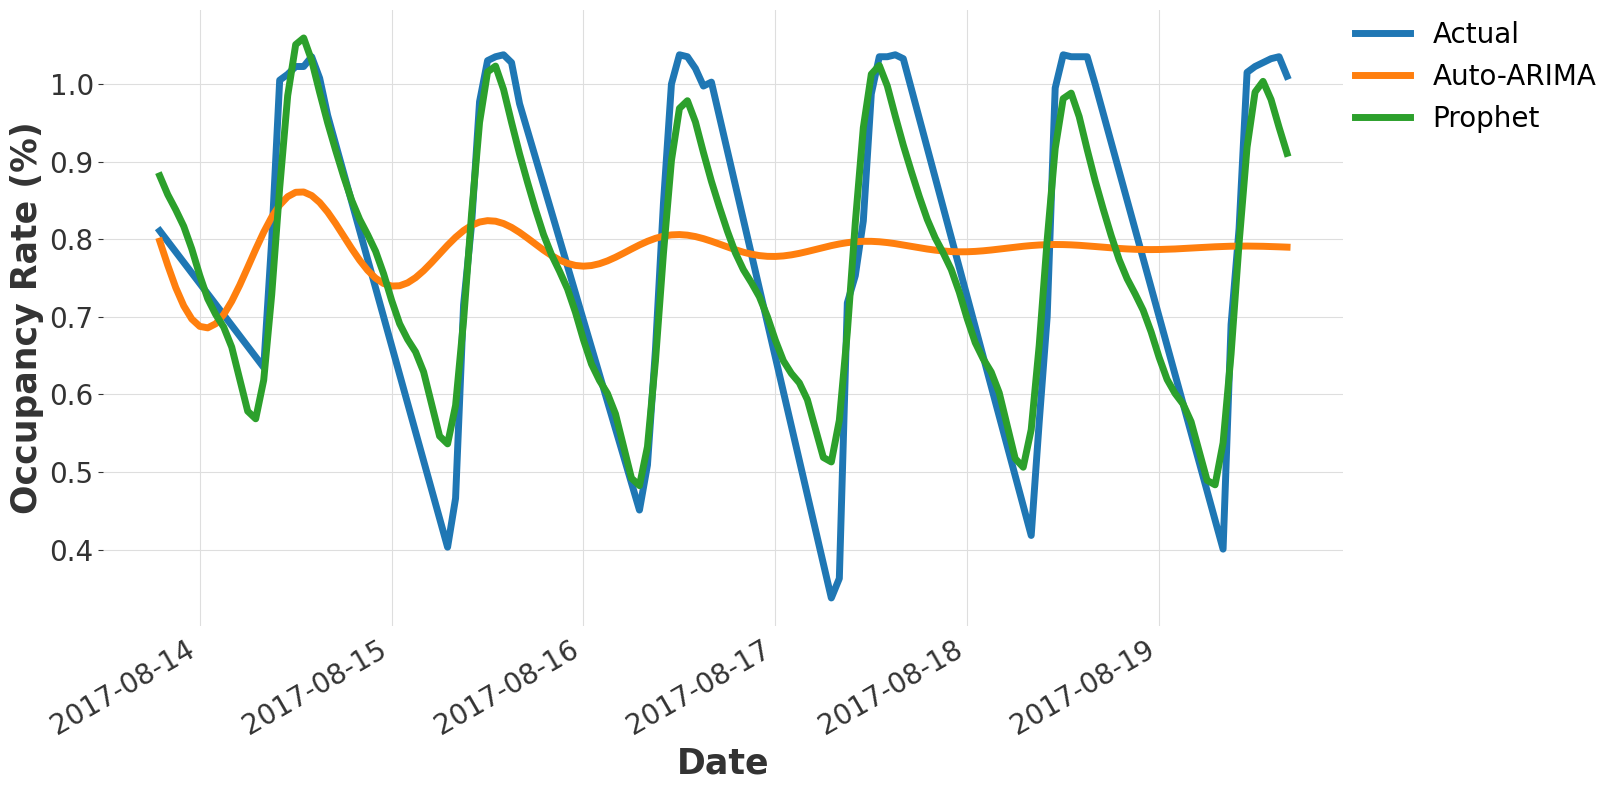

In [5]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #2

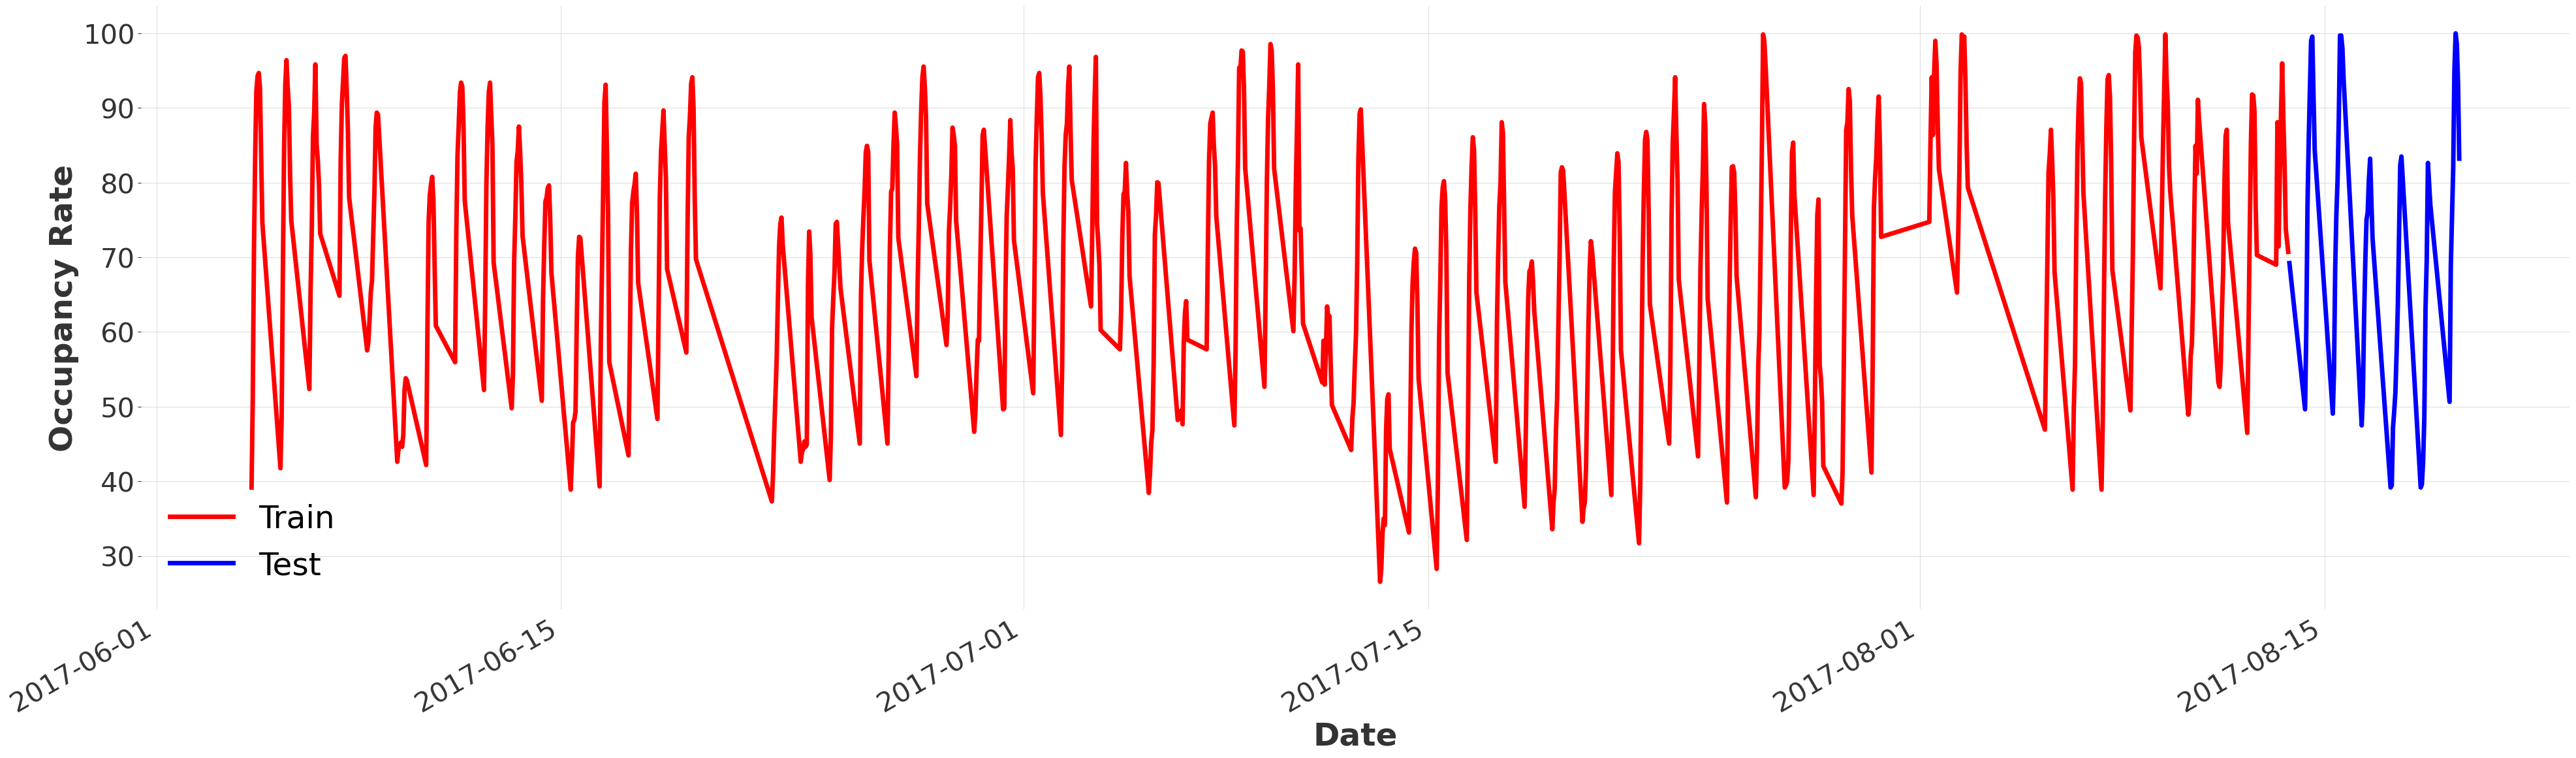

In [6]:
df = pd.read_csv('mun_2.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:51:27 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:51:27 cmdstanpy DEBUG: TBB already found in load path
2022-11-20 23:51:27 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Auto-ARIMA completed. Training time is  15.35878249999999 seconds.


2022-11-20 23:51:27 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\p67eod6t.json
2022-11-20 23:51:27 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\x37brq4e.json
2022-11-20 23:51:27 cmdstanpy DEBUG: idx 0
2022-11-20 23:51:27 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:51:27 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=84162', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\p67eod6t.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\x37brq4e.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelh4hrtbta\\prophet_model-20221120235127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:51:27 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:51:27 cmdstanpy INFO: Chain [1] start processing
23:51:28 - cmds

Prophet completed. Training time is  0.7438107999999772 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.154547  15.358782
Prophet     0.118981   0.743811


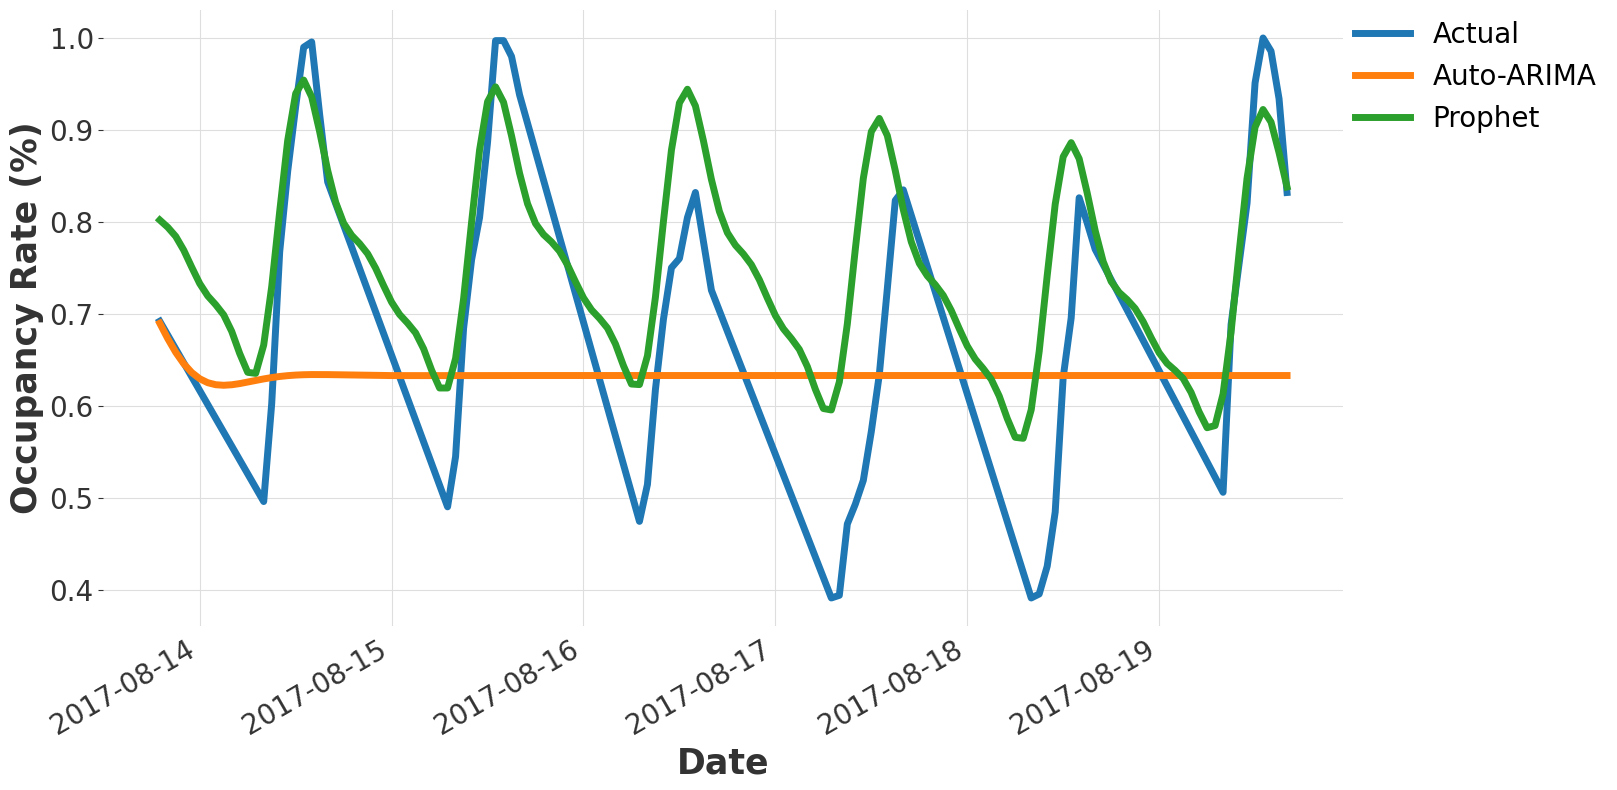

In [7]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #3

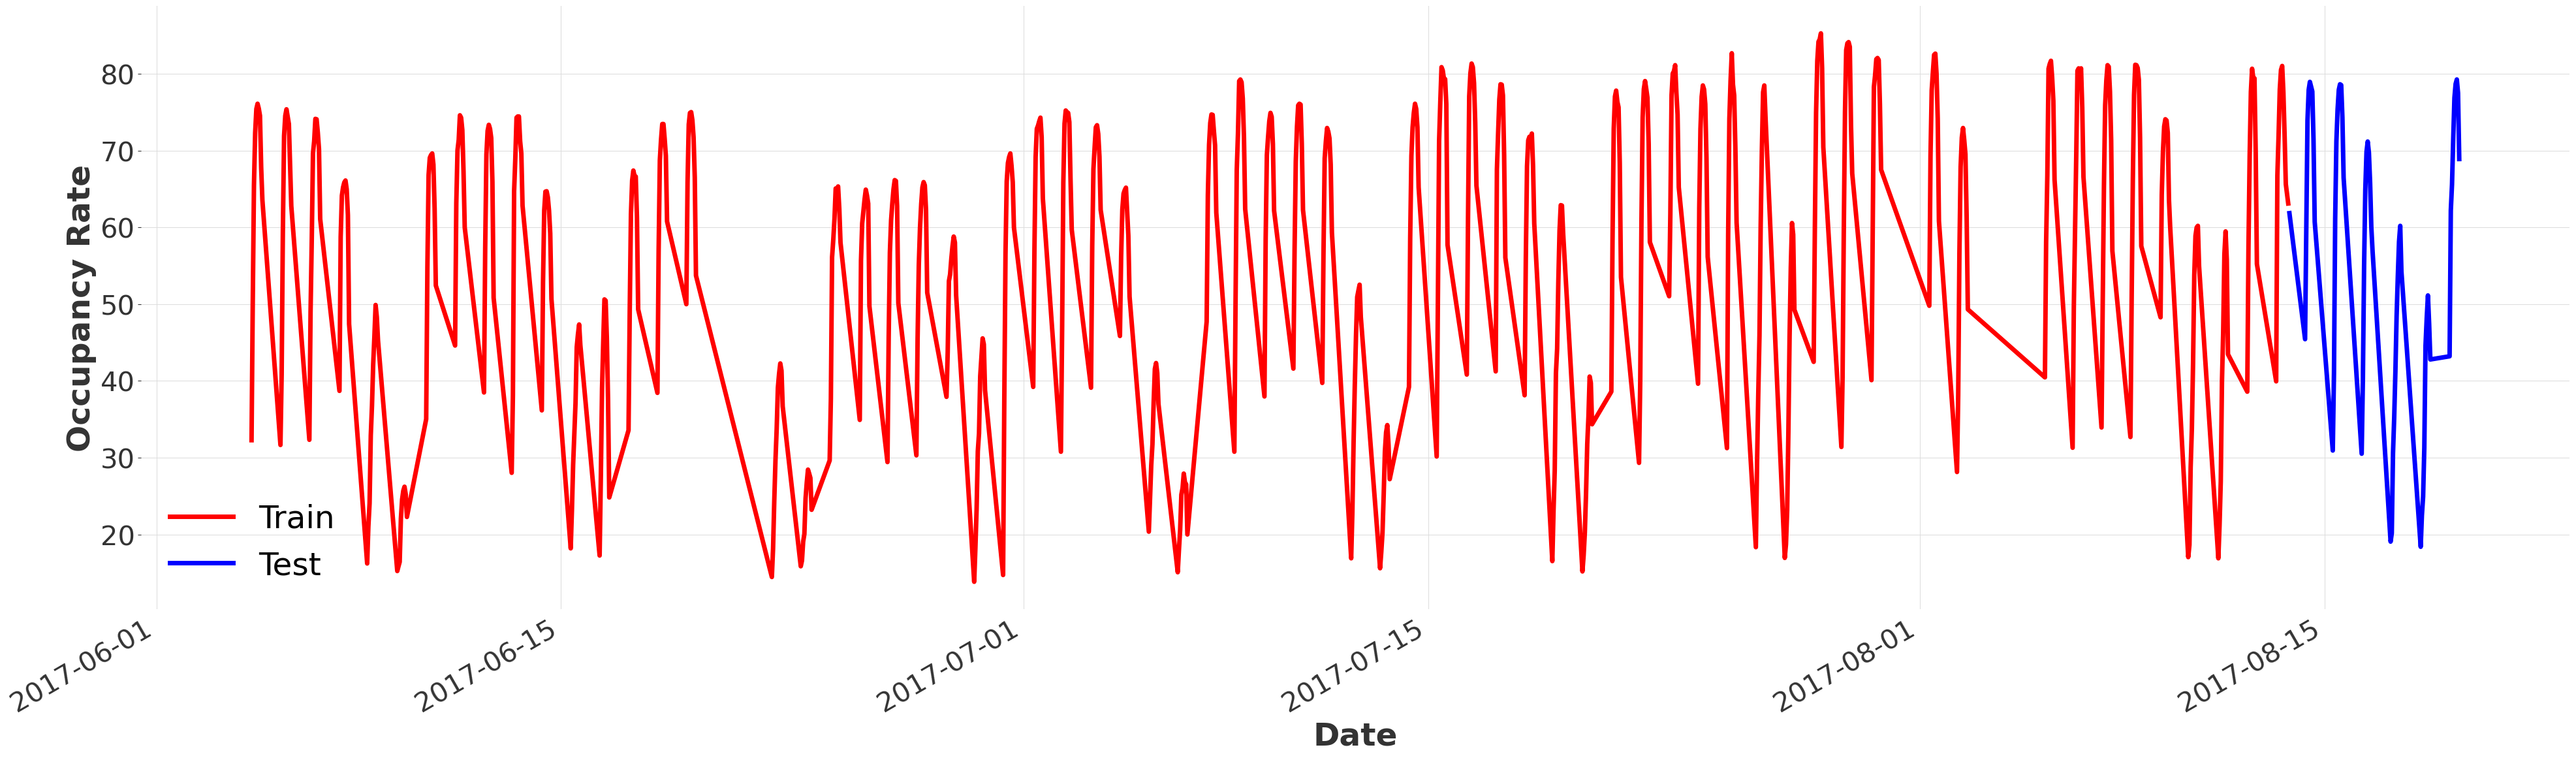

In [8]:
df = pd.read_csv('mun_3.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:51:59 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:51:59 cmdstanpy DEBUG: TBB already found in load path
2022-11-20 23:51:59 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Auto-ARIMA completed. Training time is  27.875276499999984 seconds.


2022-11-20 23:51:59 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\qnuk4u1q.json
2022-11-20 23:51:59 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\6wyhvwf4.json
2022-11-20 23:51:59 cmdstanpy DEBUG: idx 0
2022-11-20 23:51:59 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:51:59 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=9401', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\qnuk4u1q.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\6wyhvwf4.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modeldd1ntk67\\prophet_model-20221120235159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:51:59 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:51:59 cmdstanpy INFO: Chain [1] start processing
23:51:59 - cmdst

Prophet completed. Training time is  0.6144121000000098 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.168367  27.875276
Prophet     0.071863   0.614412


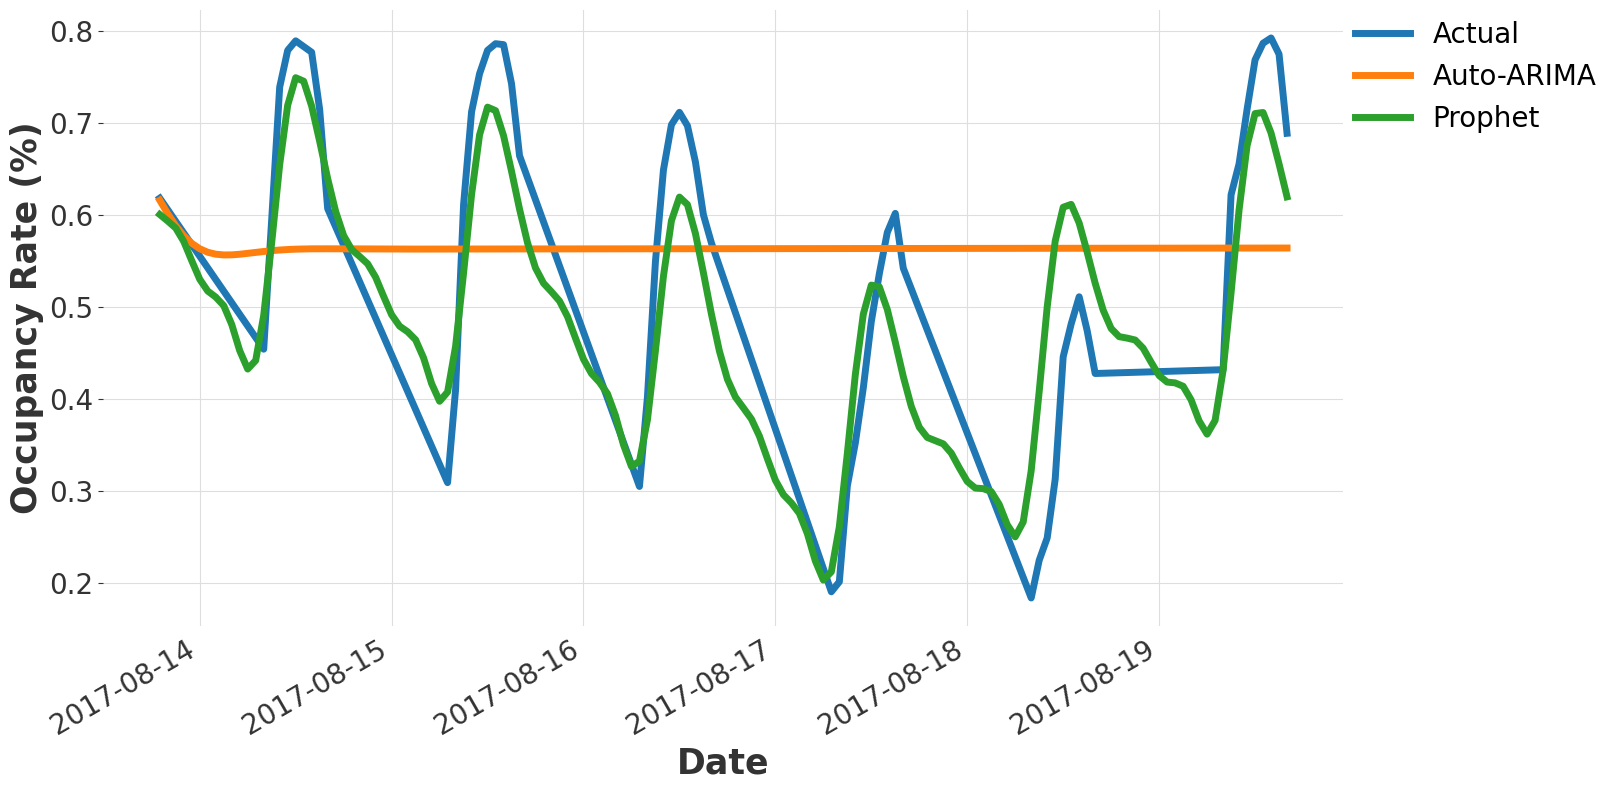

In [9]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #4

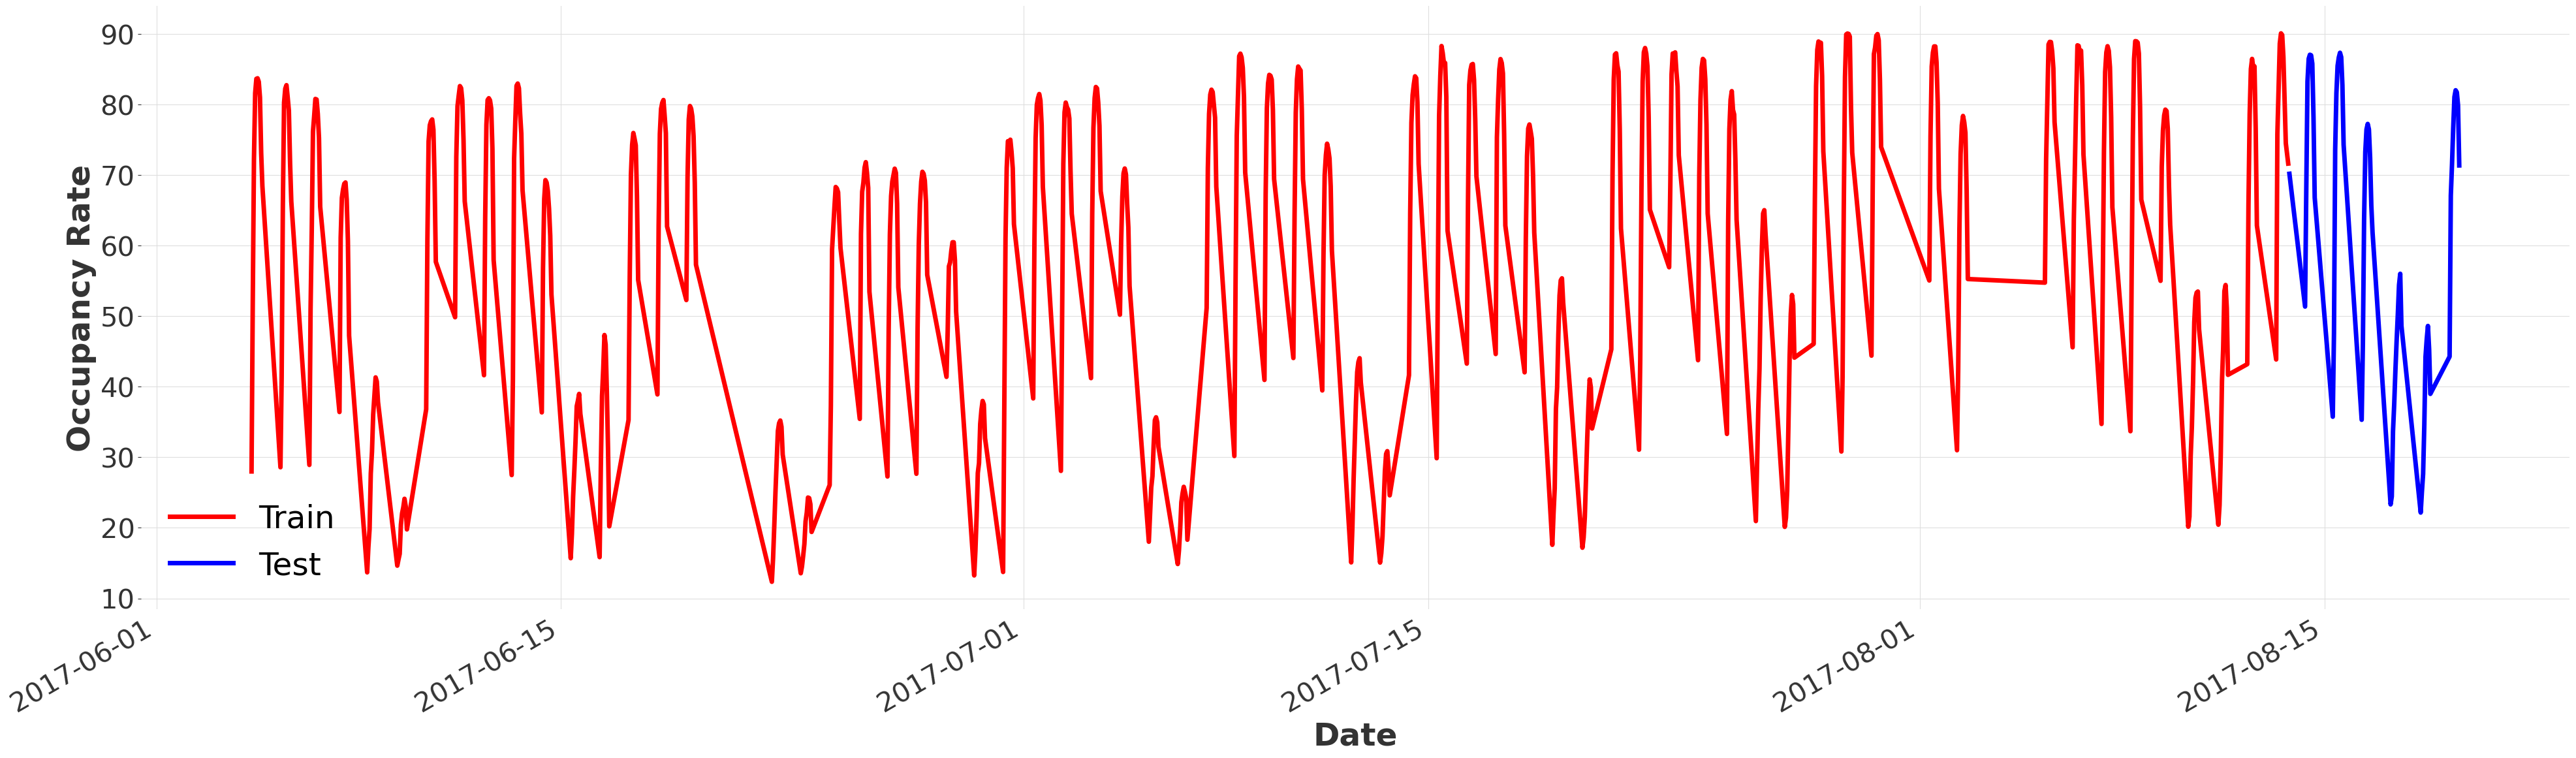

In [10]:
df = pd.read_csv('mun_4.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:52:26 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:52:27 cmdstanpy DEBUG: TBB already found in load path


Auto-ARIMA completed. Training time is  23.00967540000002 seconds.


2022-11-20 23:52:27 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-20 23:52:27 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\rkwtwelb.json
2022-11-20 23:52:27 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\ujus9nrn.json
2022-11-20 23:52:27 cmdstanpy DEBUG: idx 0
2022-11-20 23:52:27 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:52:27 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=53899', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\rkwtwelb.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\ujus9nrn.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelvz7aomh6\\prophet_model-20221120235227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:52:27 - c

Prophet completed. Training time is  0.662101100000001 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.205322  23.009675
Prophet     0.086968   0.662101


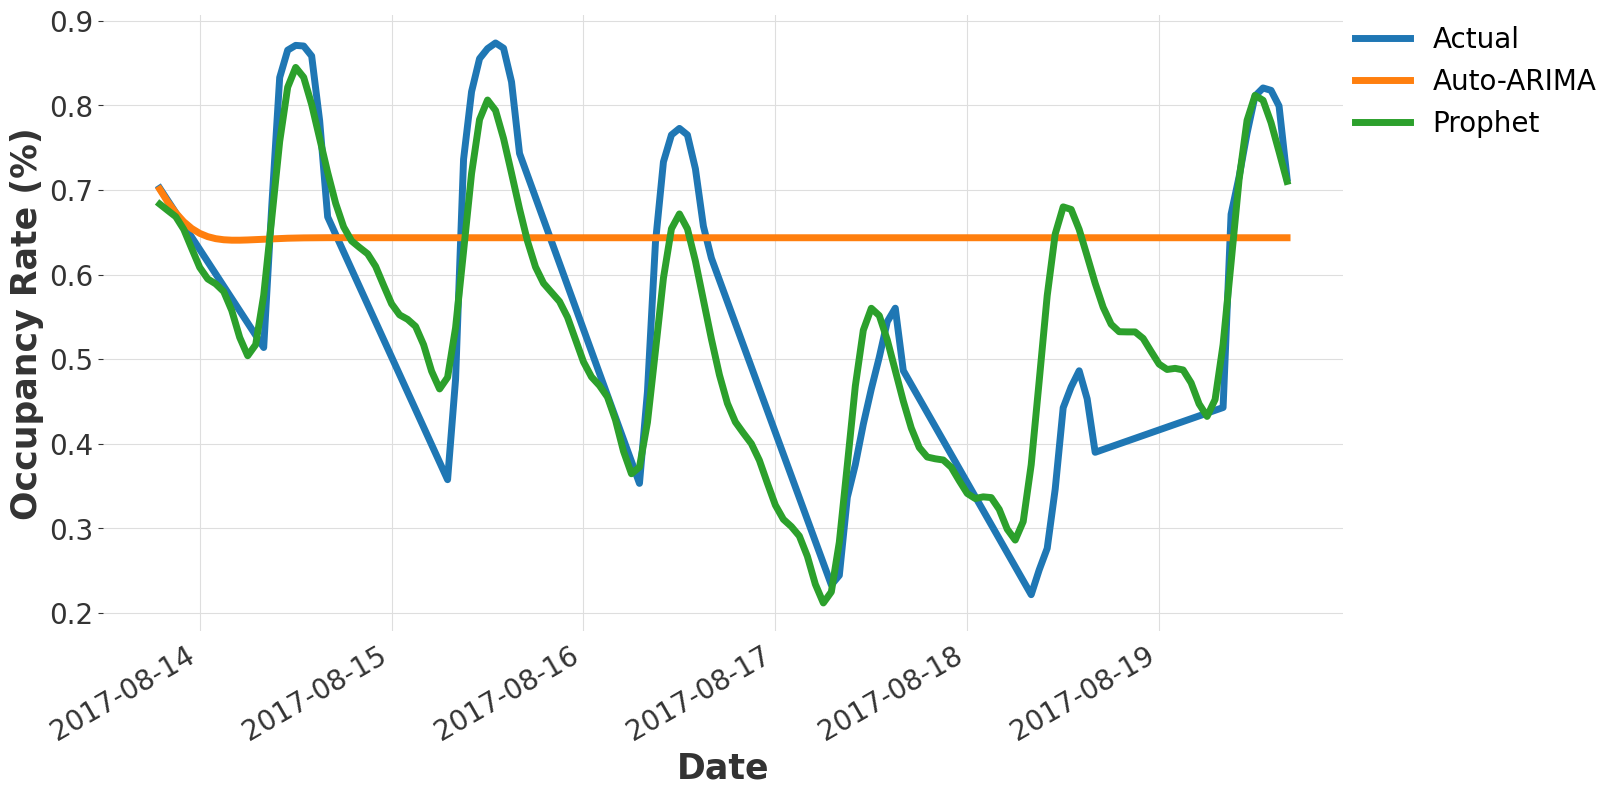

In [11]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #5

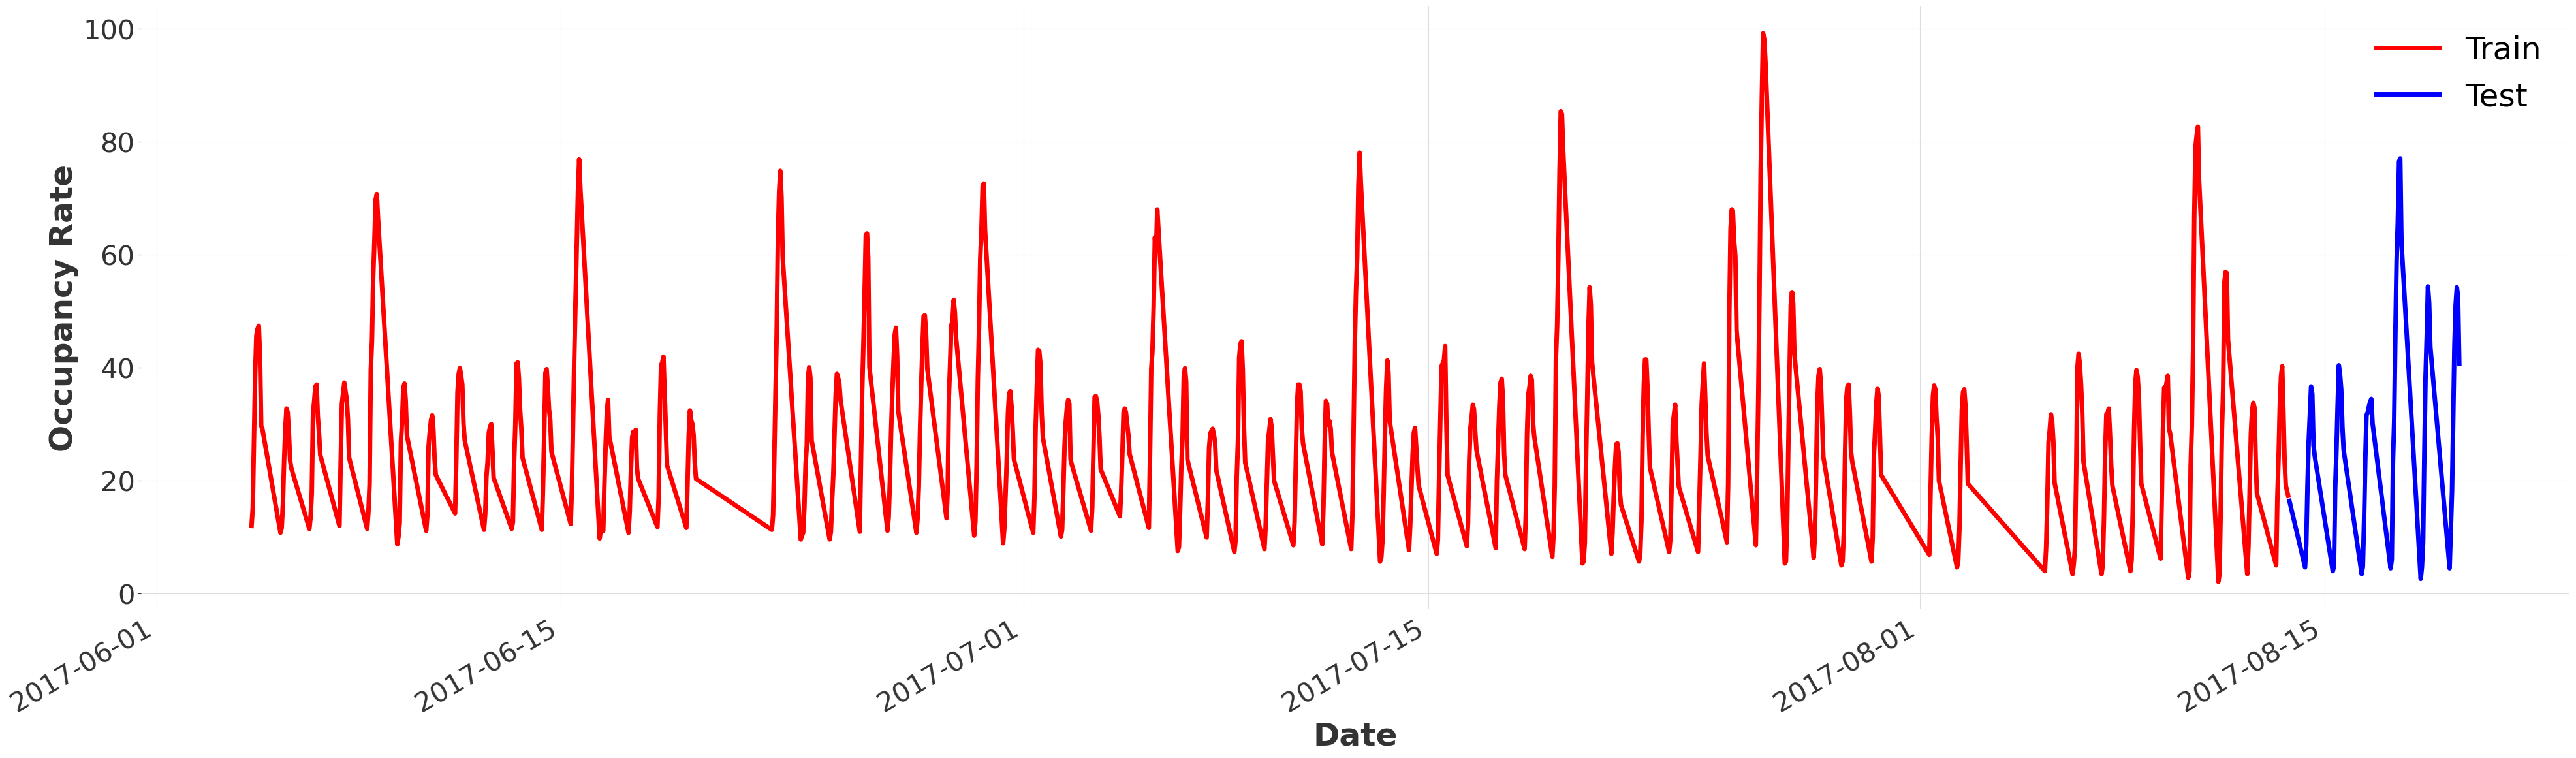

In [12]:
df = pd.read_csv('mun_5.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:53:35 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:53:35 cmdstanpy DEBUG: TBB already found in load path


Auto-ARIMA completed. Training time is  64.9568975 seconds.


2022-11-20 23:53:36 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-20 23:53:36 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\_oyblis6.json
2022-11-20 23:53:36 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\mswz7vsj.json
2022-11-20 23:53:36 cmdstanpy DEBUG: idx 0
2022-11-20 23:53:36 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:53:36 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=76978', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\_oyblis6.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\mswz7vsj.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelpipkihrf\\prophet_model-20221120235336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:53:36 - c

Prophet completed. Training time is  0.5620359000000121 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.159804  64.956897
Prophet     0.106986   0.562036


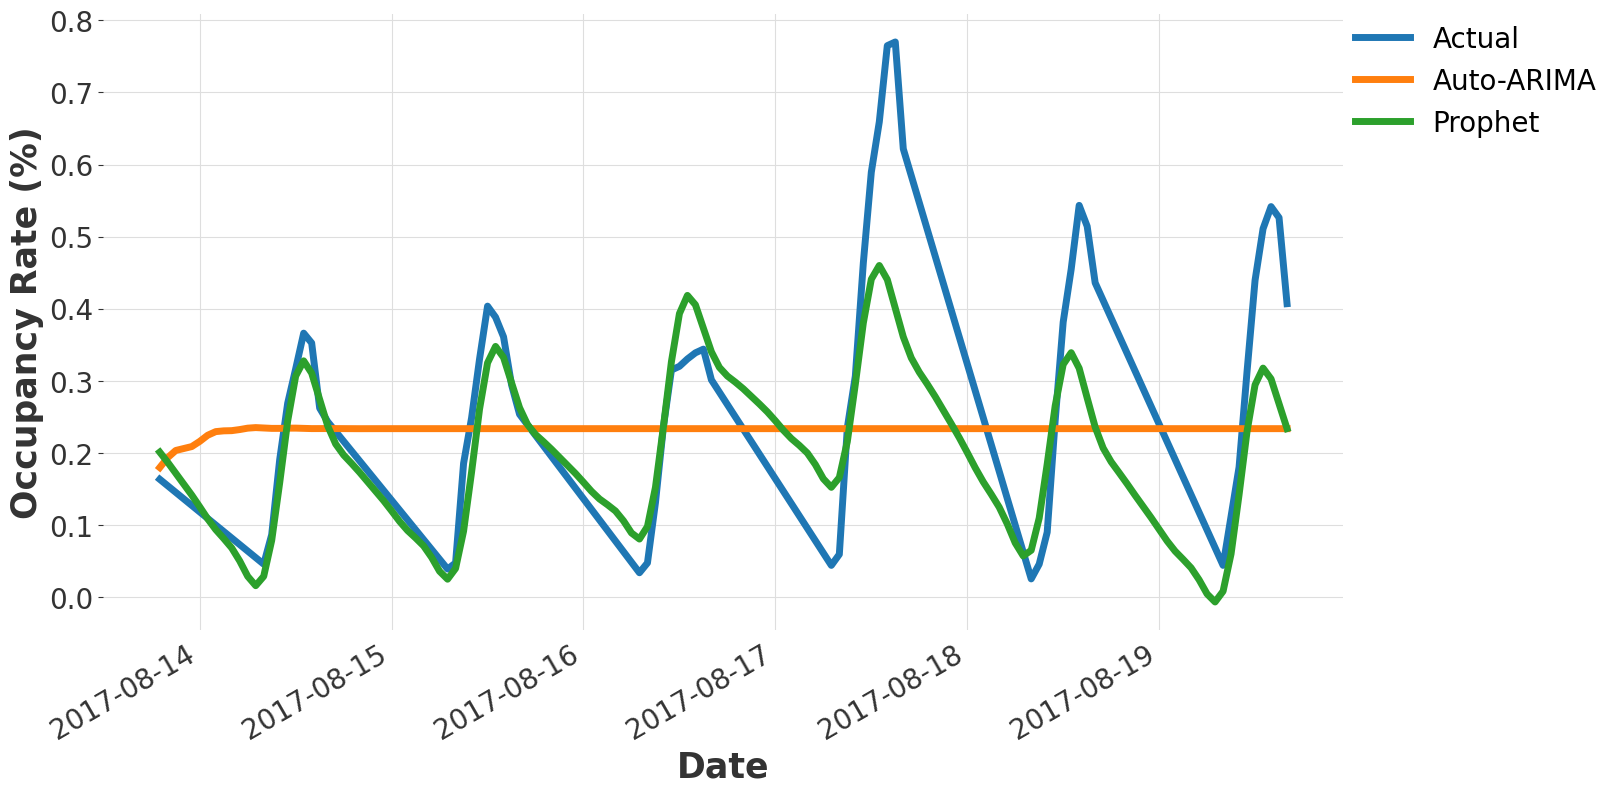

In [13]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #6

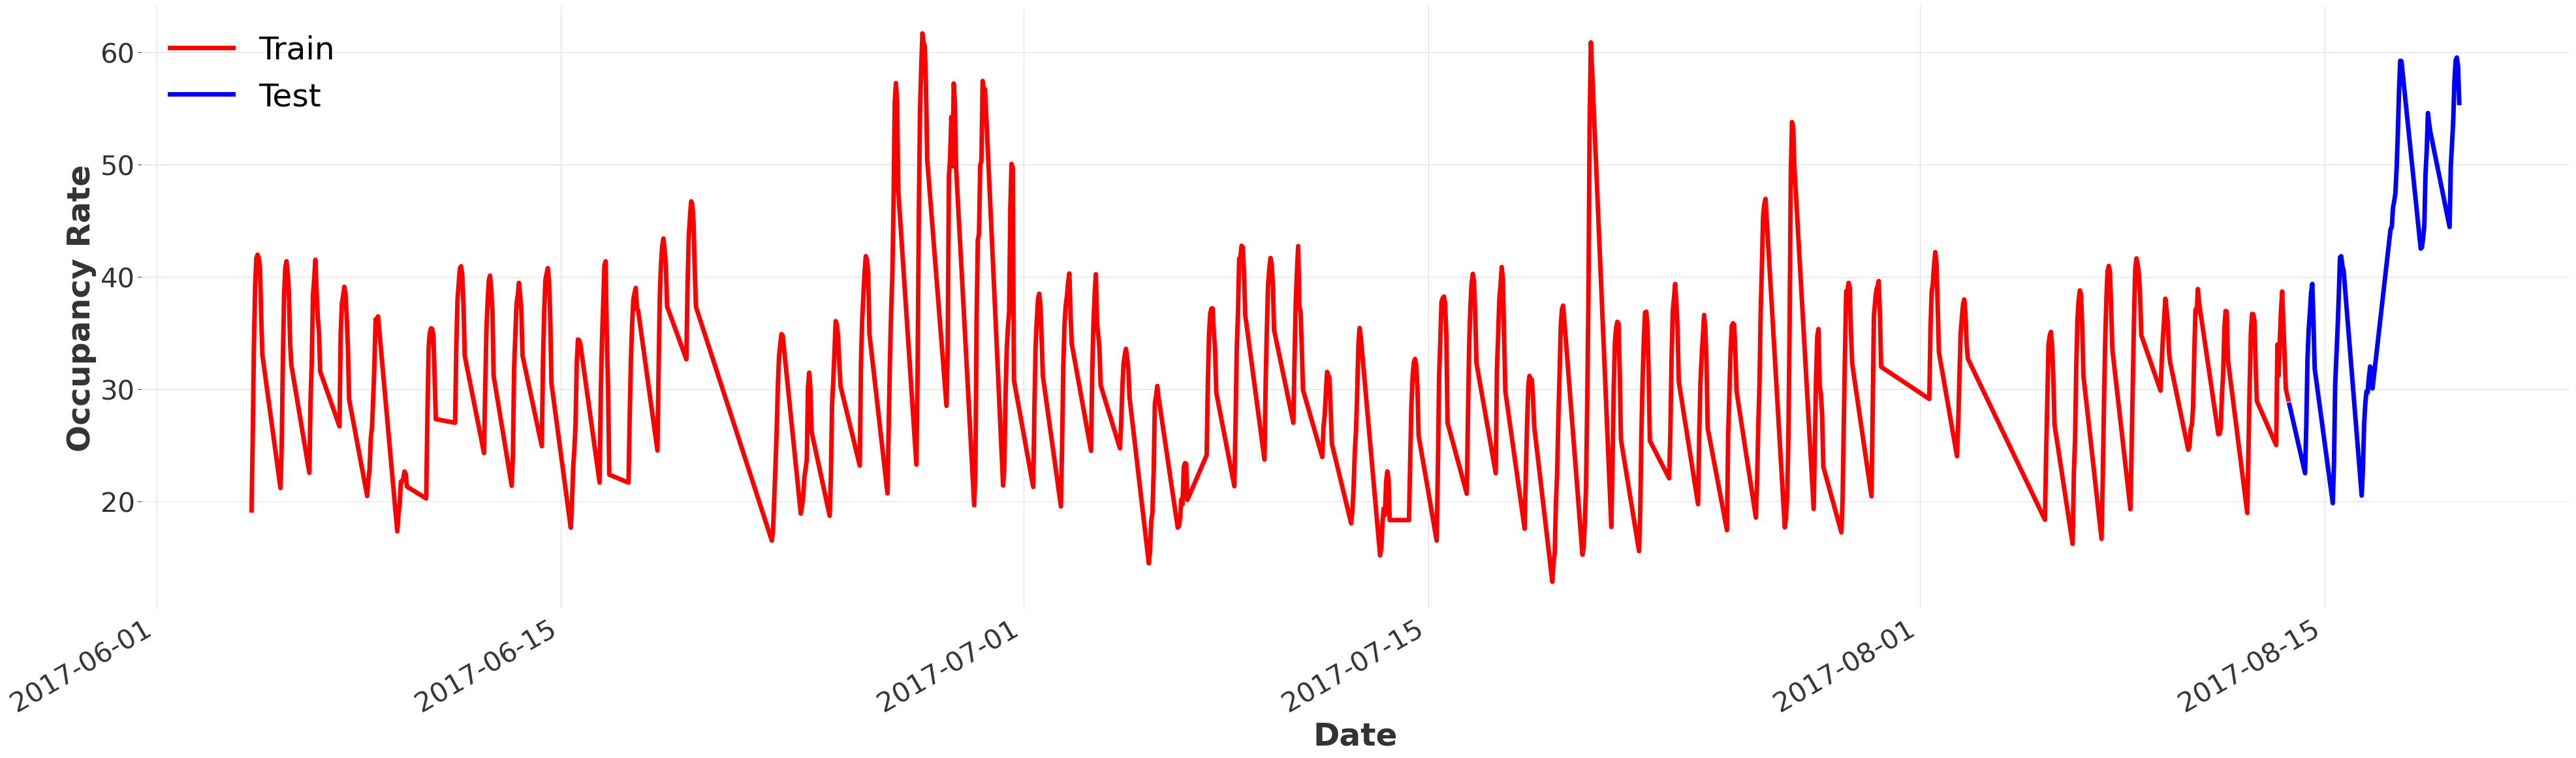

In [14]:
df = pd.read_csv('mun_6.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:54:07 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:54:07 cmdstanpy DEBUG: TBB already found in load path
2022-11-20 23:54:07 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Auto-ARIMA completed. Training time is  27.327766800000006 seconds.


2022-11-20 23:54:07 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\rzcpfkbv.json
2022-11-20 23:54:07 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\j0n6xmnu.json
2022-11-20 23:54:07 cmdstanpy DEBUG: idx 0
2022-11-20 23:54:07 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:54:07 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=66466', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\rzcpfkbv.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\j0n6xmnu.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelxci8k3nw\\prophet_model-20221120235407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:07 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:54:07 cmdstanpy INFO: Chain [1] start processing
23:54:08 - cmds

Prophet completed. Training time is  1.154184100000009 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.148915  27.327767
Prophet     0.144407   1.154184


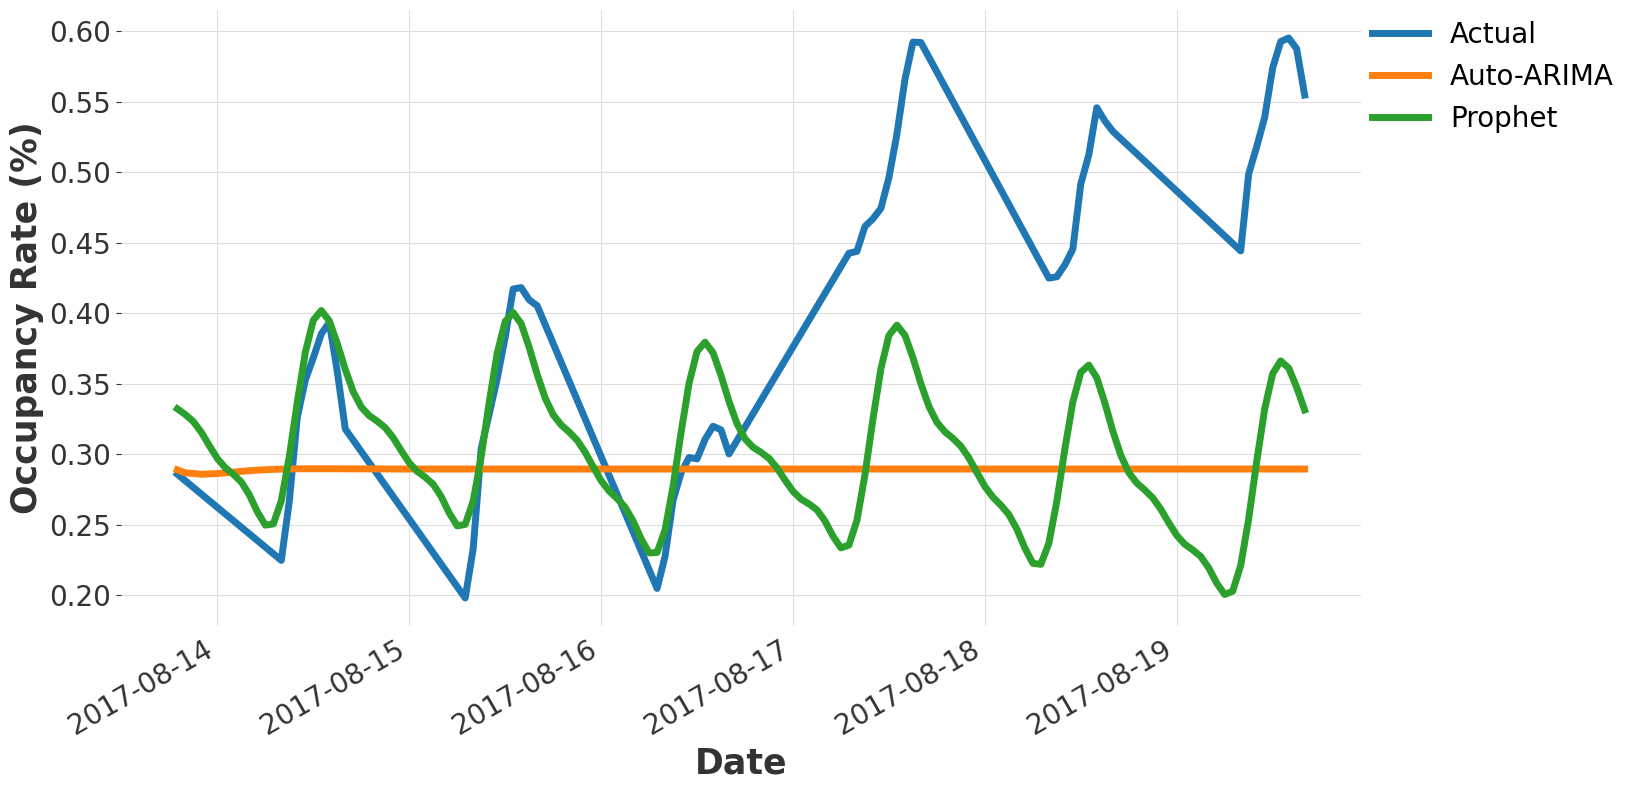

In [15]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #7

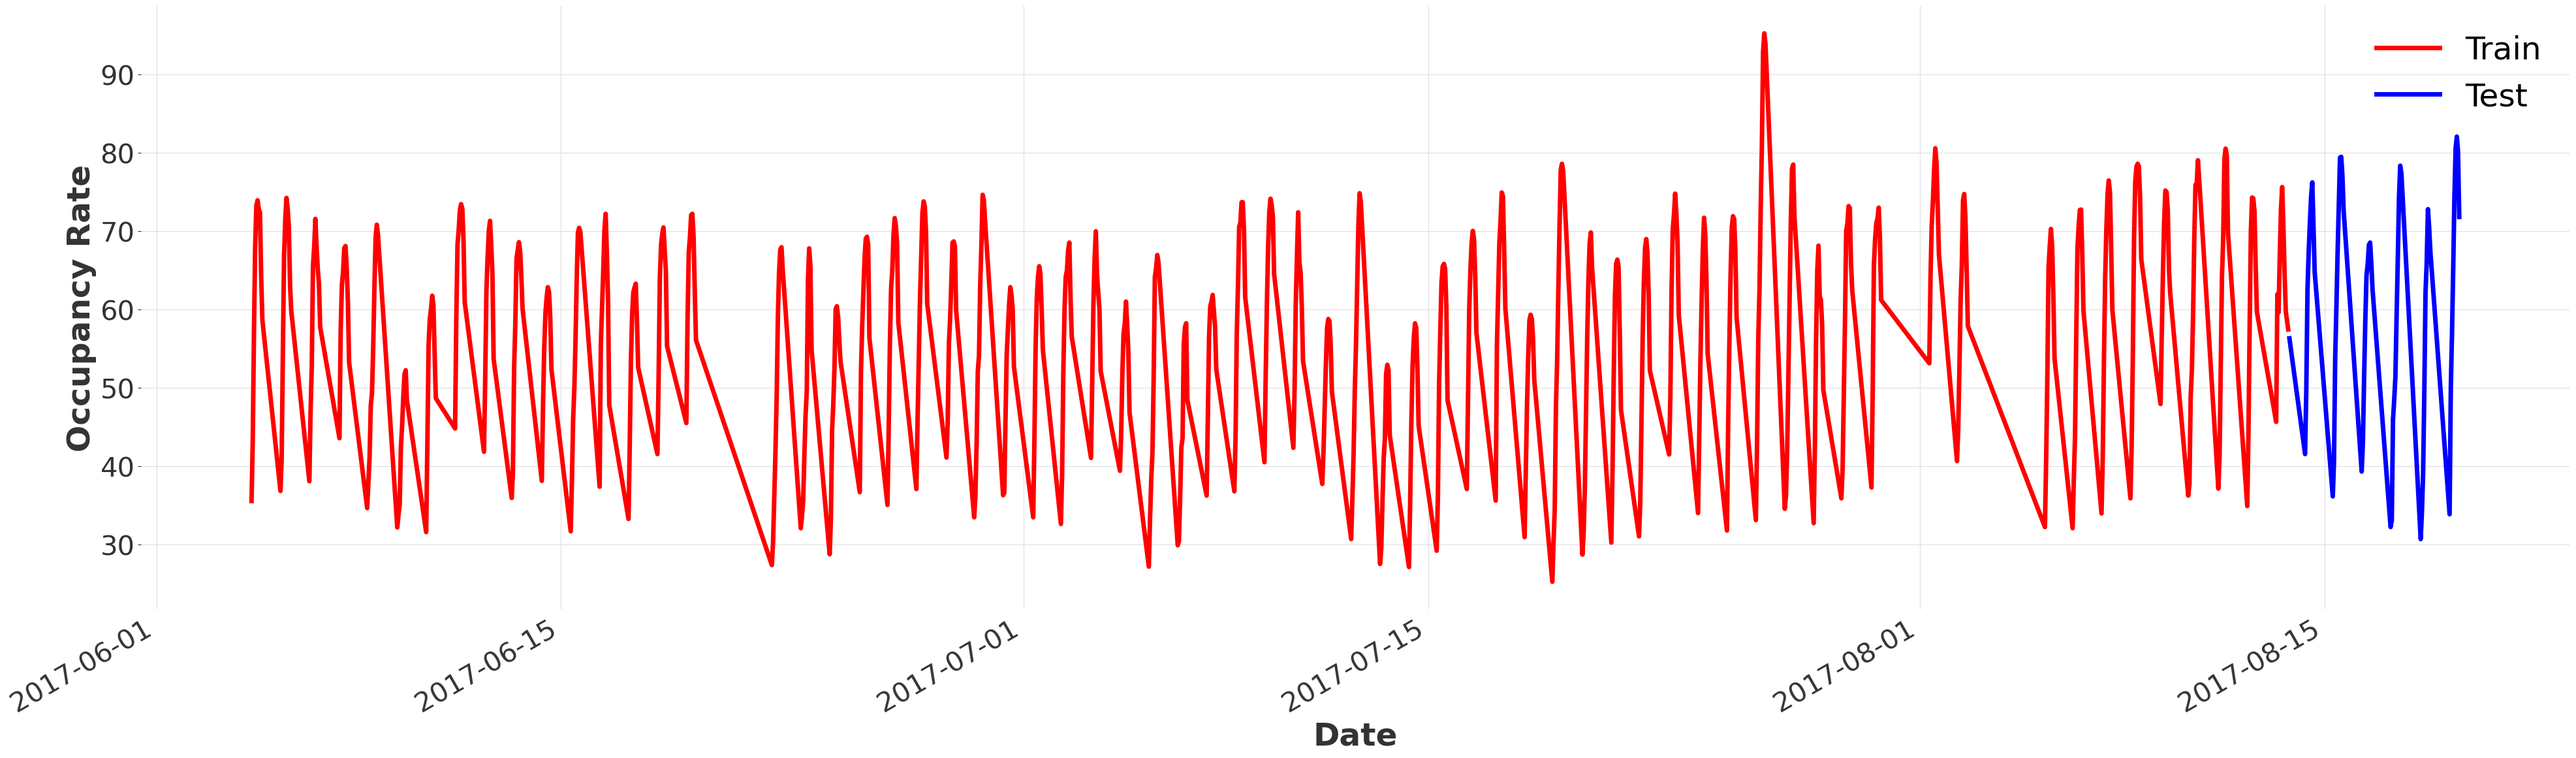

In [16]:
df = pd.read_csv('mun_7.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:54:38 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:54:38 cmdstanpy DEBUG: TBB already found in load path


Auto-ARIMA completed. Training time is  26.355913199999975 seconds.


2022-11-20 23:54:38 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-20 23:54:38 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\ik86ps_p.json
2022-11-20 23:54:38 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\keublfji.json
2022-11-20 23:54:38 cmdstanpy DEBUG: idx 0
2022-11-20 23:54:38 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:54:38 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=75522', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\ik86ps_p.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\keublfji.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelzez78gxc\\prophet_model-20221120235438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:38 - c

Prophet completed. Training time is  0.5682454999999891 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.138653  26.355913
Prophet     0.063109   0.568245


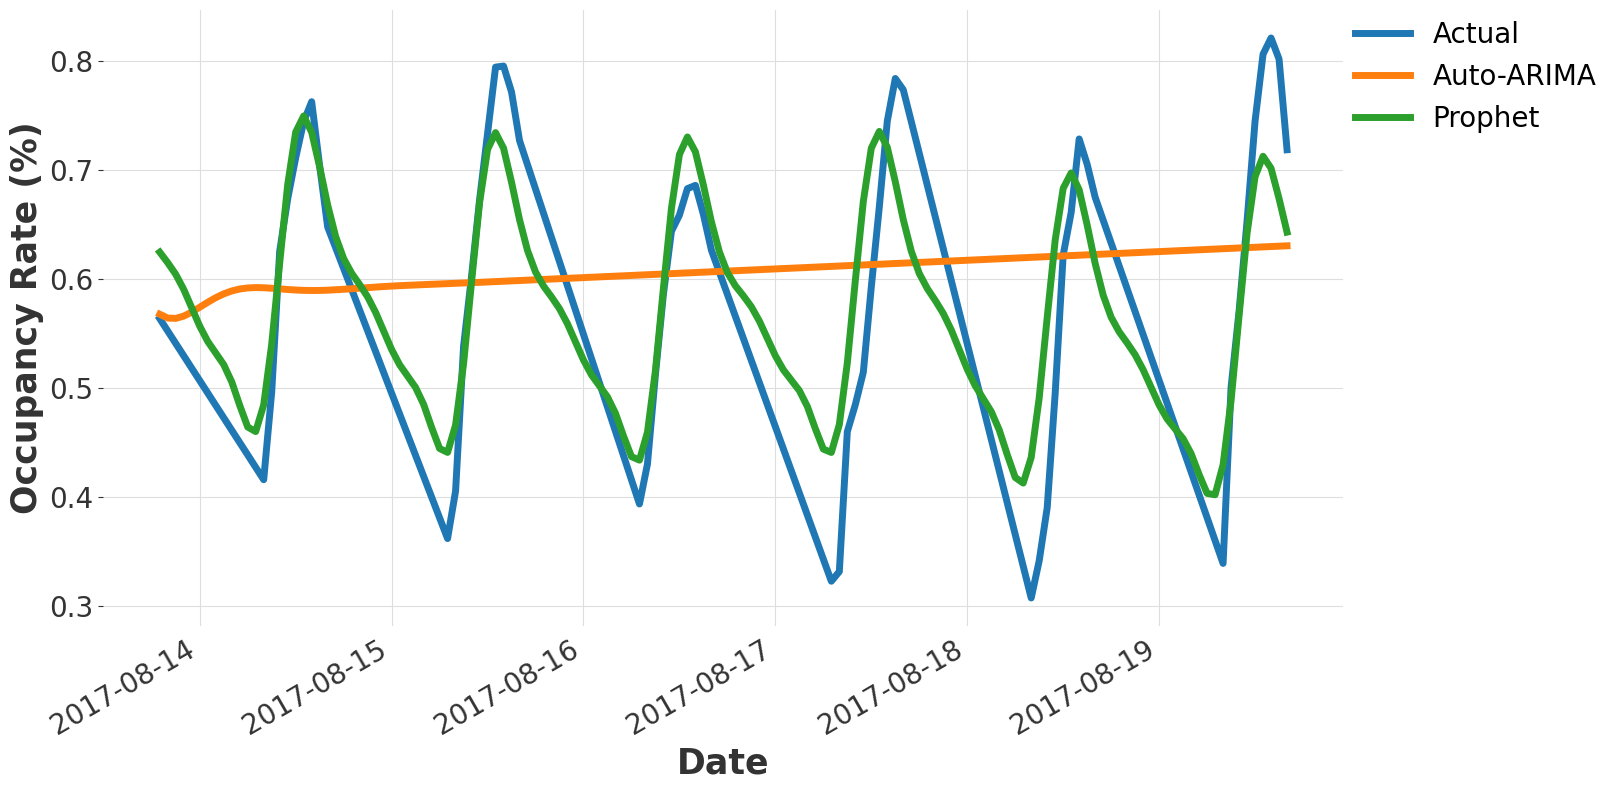

In [17]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #8

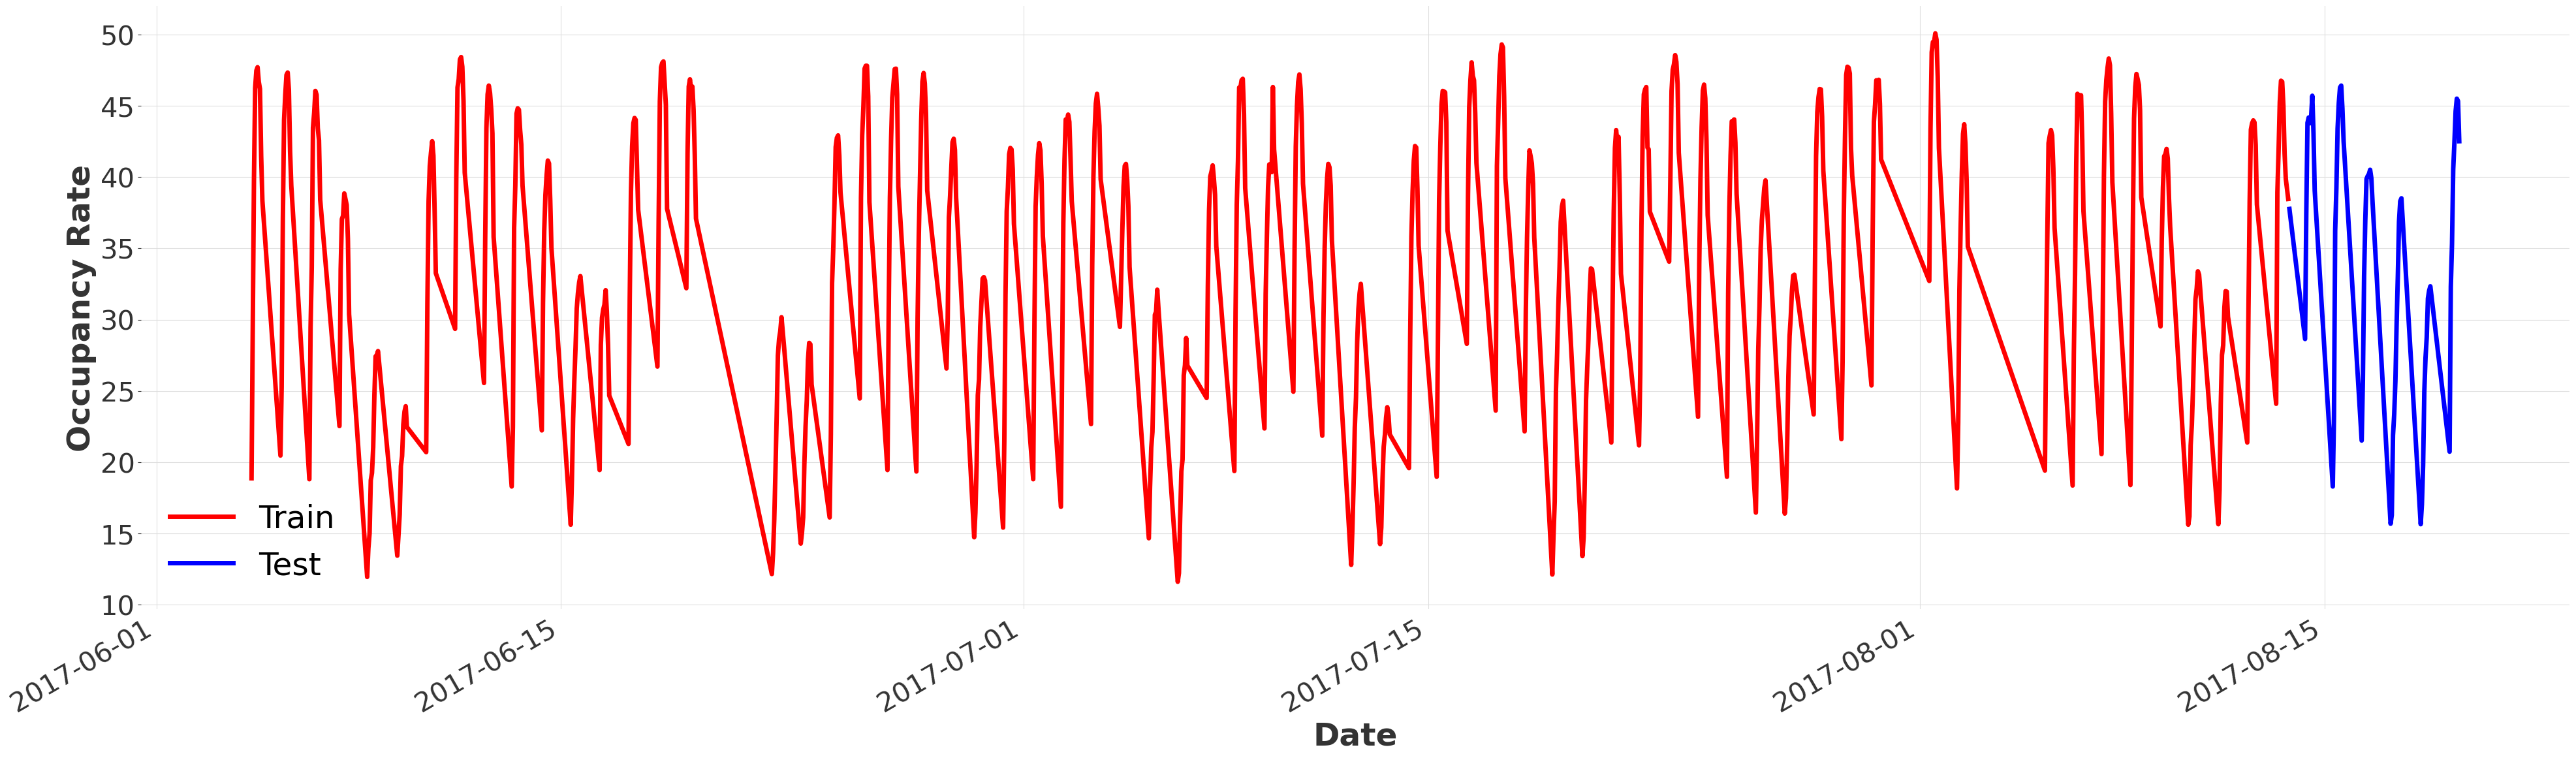

In [18]:
df = pd.read_csv('mun_8.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:55:03 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:55:04 cmdstanpy DEBUG: TBB already found in load path
2022-11-20 23:55:04 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Auto-ARIMA completed. Training time is  21.002472599999976 seconds.


2022-11-20 23:55:04 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\ihaz49i9.json
2022-11-20 23:55:04 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\pb8s06nl.json
2022-11-20 23:55:04 cmdstanpy DEBUG: idx 0
2022-11-20 23:55:04 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:55:04 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=85372', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\ihaz49i9.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\pb8s06nl.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_model25s0voas\\prophet_model-20221120235504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:55:04 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:55:04 cmdstanpy INFO: Chain [1] start processing
23:55:04 - cmds

Prophet completed. Training time is  0.5700097999999798 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.078545  21.002473
Prophet     0.041870   0.570010


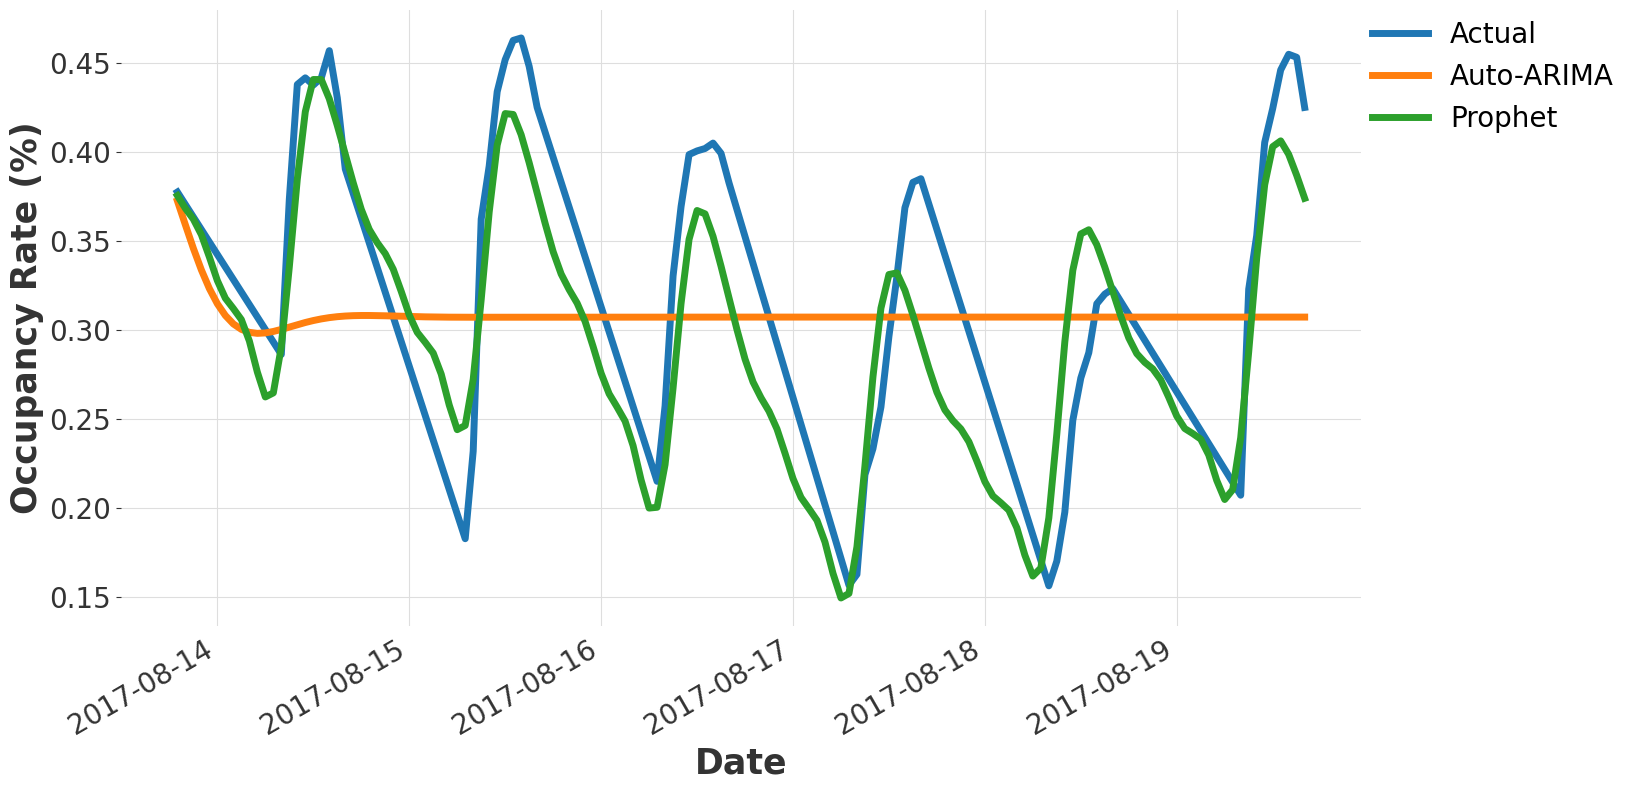

In [19]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()

# Municipality #9

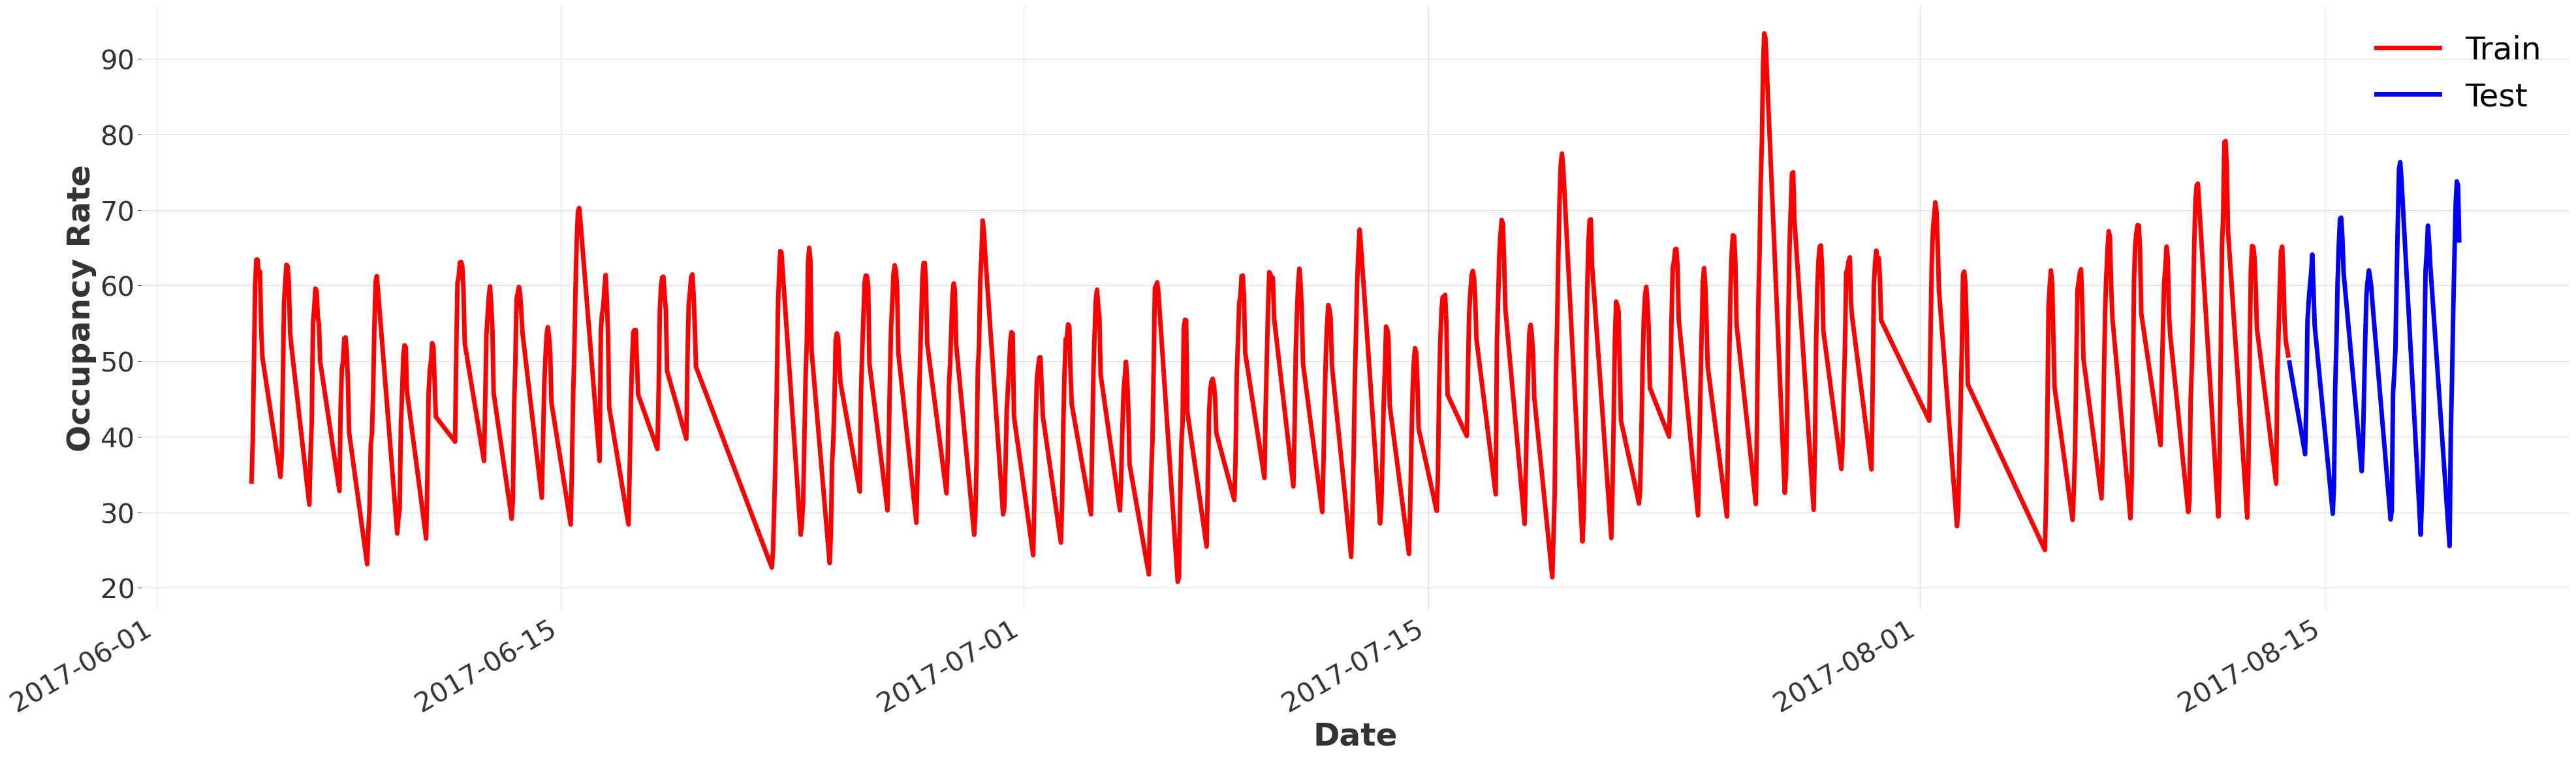

In [20]:
df = pd.read_csv('mun_9.csv',parse_dates=["timestamp"],index_col="timestamp")
ts = df.resample('H').interpolate()
ts = TimeSeries.from_dataframe(ts)

chunk = -142
train = ts[:chunk]
test = ts[chunk:]

plt.figure(101, figsize=(48, 12))
(train*100).plot(label='Train', color='red', linewidth=5)
(test*100).plot(label='Test', color='blue', linewidth=5)
plt.xlabel('Date', fontsize=35)
plt.ylabel('Occupancy Rate', fontsize=35)
plt.rc('legend',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('train-test-plot.png')
plt.legend()

2022-11-20 23:55:38 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-20 23:55:39 cmdstanpy DEBUG: TBB already found in load path
2022-11-20 23:55:39 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Auto-ARIMA completed. Training time is  30.771732799999995 seconds.


2022-11-20 23:55:39 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\sdmgjxee.json
2022-11-20 23:55:39 cmdstanpy DEBUG: input tempfile: C:\Users\omerf\AppData\Local\Temp\tmp59_rxclf\u26ox7pw.json
2022-11-20 23:55:39 cmdstanpy DEBUG: idx 0
2022-11-20 23:55:39 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-20 23:55:39 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\omerf\\AppData\\Roaming\\Python\\Python39\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=66395', 'data', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\sdmgjxee.json', 'init=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\u26ox7pw.json', 'output', 'file=C:\\Users\\omerf\\AppData\\Local\\Temp\\tmp59_rxclf\\prophet_modelb9fl4shj\\prophet_model-20221120235539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:55:39 - cmdstanpy - INFO - Chain [1] start processing
2022-11-20 23:55:39 cmdstanpy INFO: Chain [1] start processing
23:55:39 - cmds

Prophet completed. Training time is  0.4995761999999786 seconds.
                RMSE  Time(sec)
Auto-ARIMA  0.120538  30.771733
Prophet     0.062491   0.499576


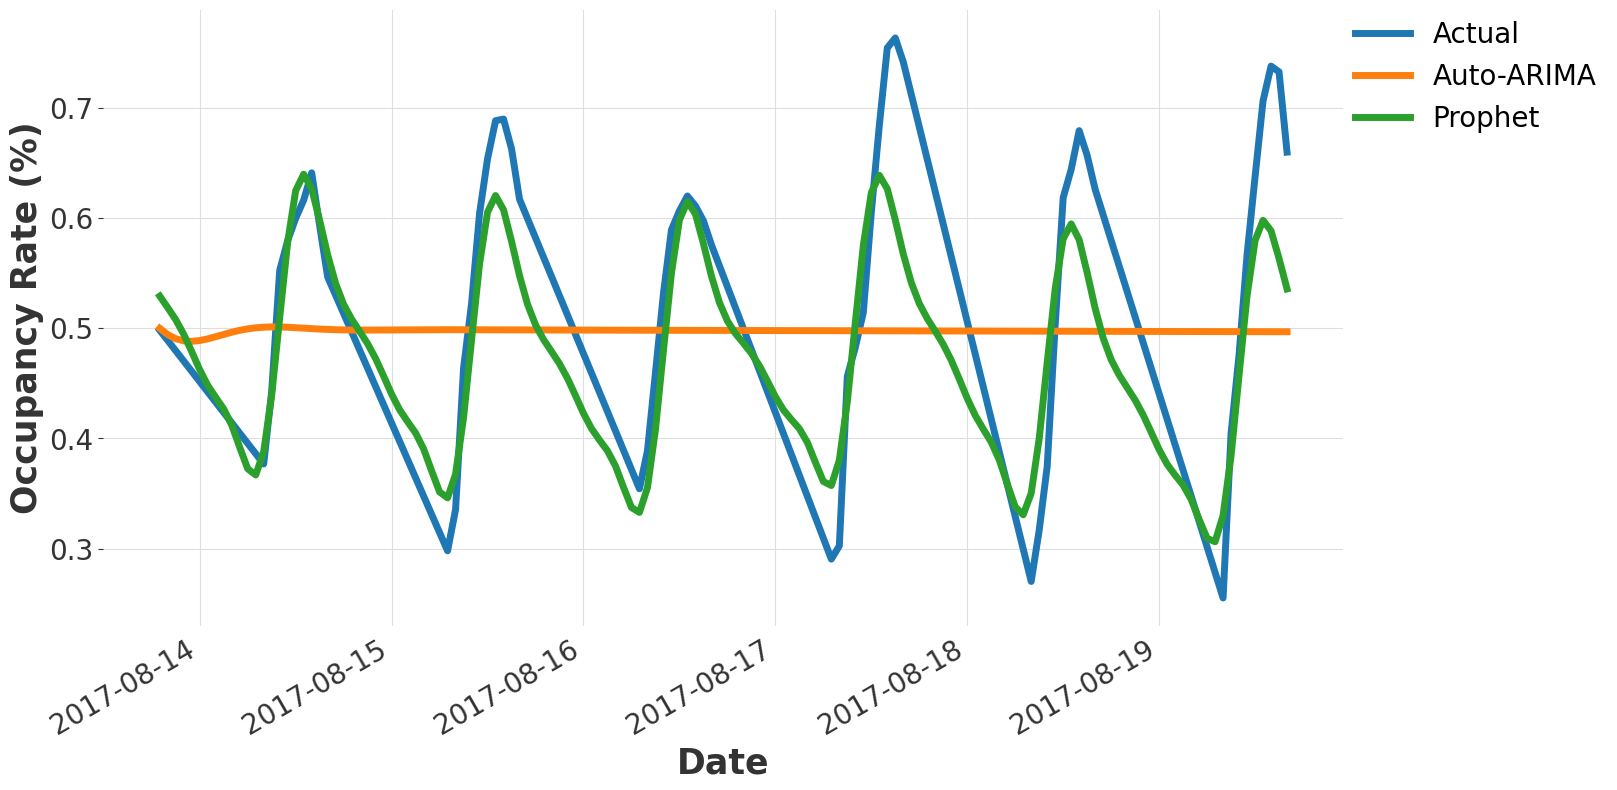

In [21]:
start_time = time.perf_counter ()

m_arima = AutoARIMA()
m_arima.fit(train)

end_time = time.perf_counter ()

forecast_arima = m_arima.predict(len(test))
rmse_arima = rmse(test, forecast_arima)

time_arima = end_time - start_time
print("Auto-ARIMA completed. Training time is " ,end_time - start_time, "seconds.")

start_time = time.perf_counter ()

m_prophet = Prophet()
m_prophet.fit(train)

end_time = time.perf_counter ()

forecast_prophet = m_prophet.predict(len(test))
rmse_prophet = rmse(test, forecast_prophet)

time_prophet = end_time - start_time
print("Prophet completed. Training time is " ,end_time - start_time, "seconds.")

models = ['Auto-ARIMA', 'Prophet']
rmses = [rmse_arima, rmse_prophet]
times = [time_arima, time_prophet]

results = pd.DataFrame(rmses, index=models, columns =['RMSE'])
results['Time(sec)'] = times
print(results)

plt.figure(figsize=(16,8))
plt.title('Forecasting Results')
test.plot(label='Actual', color='tab:blue', linewidth=5)
forecast_arima.plot(label='Auto-ARIMA', color='tab:orange', linewidth=5)
forecast_prophet.plot(label='Prophet', color='tab:green', linewidth=5)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Occupancy Rate (%)', fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast.png')
plt.show()